In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

datadf = pd.read_csv('data/data-and-metrics.csv')

In [272]:
def getOrder(distractor):
    if distractor == 'random':
        return ["low","medium","high","all"]
    else:
        return ["large smooth","medium smooth","small smooth","large rough","medium rough","small rough"]

def plotDistractorByBasemap(distractor, basemap):
    datadfLim = datadf.loc[datadf['distractor'] == distractor]
    datadfLim = datadfLim.loc[datadf['basemap'] == basemap]    
    plt.figure(figsize=(15,5))
    chart = sns.catplot(x="distractorlevel", y="timetaken", hue="target", data=datadfLim, kind="point",
                        hue_order=["gestalt","less gestalt","no target"],
                        order=getOrder(distractor),
                        ci=None,height=4, aspect=2)
    chart.set(ylim=((1000, 2300)))
    sns.reset_orig()
    
    
def plotDistractorByColor(distractor, color):
    datadfLim = datadf.loc[datadf['distractor'] == distractor]
    datadfLim = datadfLim.loc[datadf['color'] == color]    
    plt.figure(figsize=(15,5))
    chart = sns.catplot(x="distractorlevel", y="timetaken", hue="target", data=datadfLim, kind="point",
                        hue_order=["gestalt","less gestalt","no target"],
                        order=getOrder(distractor),
                        ci=None,height=4, aspect=2)
    chart.set(ylim=((1000, 2300)))
    sns.reset_orig()    

def plotMetric(metric):
    plt.figure(figsize=(15,5))
    chart = sns.catplot(x=metric, 
                        y="timetaken", 
                        hue="target", 
                        data=datadf, 
                        kind="point",
                        hue_order=["gestalt","less gestalt","no target"],
                        ci=None,
                        height=4, 
                        aspect=2)

#     ticks = chart.axes[0][0].get_xticks()
    ax = chart.axes[0][0]
    
#     new_labels = [round(float(i), 2) for i in ticks]
#     ax.set_xticklabels(new_labels)
    
#     f = lambda x,pos: str(x).rstrip('0').rstrip('.')
#     ax.xaxis.set_major_formatter(ticker.FuncFormatter(f))
    
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=20))
#     ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1f}'))
#     ax.set_xticklabels(ticks.astype(int))


#     chart.set_xticklabels(xlabels)
#     chart.set_xticklabels(rotation=90)
    sns.reset_orig()
    return chart


def plotMetricq(metric):
    datadf['q_rank'] = pd.qcut(datadf[metric], 10, labels = False) 
    plt.figure(figsize=(15,5))
    chart = sns.catplot(x='q_rank', 
                        y="timetaken", 
                        hue="target", 
                        data=datadf, 
                        kind="point",
                        hue_order=["gestalt","less gestalt","no target"],
                        ci=None,
                        height=4, 
                        aspect=2)
    
    ticks = chart.axes[0][0].get_xticks()
    xlabels = ["{:1.0f}".format(float(s)) for s in ticks]
    chart.set_xticklabels(xlabels)
    chart.set_xticklabels(rotation=90)
    sns.reset_orig()
    return chart


def plotMetricByBasemap(metric, basemap):
    datadfLim = datadf.loc[datadf['basemap'] == basemap]
    datadfLim = datadfLim.reset_index()  
    plt.figure(figsize=(15,5))
    chart = sns.catplot(x=metric, 
                        y="timetaken", 
                        hue="target", 
                        data=datadfLim, 
                        kind="point",
                        hue_order=["gestalt","less gestalt","no target"],
                        ci=None,
                        height=4, 
                        aspect=2)
    sns.reset_orig()
    return chart

def plotMetricByBasemapq(metric, basemap):
    datadfLim = datadf.loc[datadf['basemap'] == basemap]
    datadfLim = datadfLim.reset_index()   
    datadfLim['q_rank'] = pd.qcut(datadfLim[metric], 10, labels = False) 
    plt.figure(figsize=(15,5))
    chart = sns.catplot(x='q_rank', 
                        y="timetaken", 
                        hue="target", 
                        data=datadfLim, 
                        kind="point",
                        hue_order=["gestalt","less gestalt","no target"],
                        ci=None,
                        height=4, 
                        aspect=2)
    sns.reset_orig()
    return chart



def plotKDEMetric(metric):
    grouped_single = datadf.groupby([metric, 'target']).agg({'timetaken': ['mean'],'correct': ['mean']})
    grouped_single = grouped_single.reset_index()
    grouped_single.columns = [metric, 'target','timetaken_mean', 'correct_mean']
    sns.set(rc={'axes.facecolor':'#073467', 'axes.grid' : False})
    chart = sns.FacetGrid(grouped_single, 
                          col="target",
                          col_order=["gestalt","less gestalt","no target"])
    chart.map(sns.kdeplot, metric,'timetaken_mean', fill=True, thresh=0, levels=100, cmap='RdBu_r' )
    chart.fig.set_figwidth(9)
    chart.fig.set_figheight(4)
    sns.reset_orig()
    return chart

def plotKDEMetricByBasemap(metric, basemap):
    datadfLim = datadf.loc[datadf['basemap'] == basemap]
    datadfLim = datadfLim.reset_index()
    grouped_single = datadfLim.groupby([metric, 'target']).agg({'timetaken': ['mean'],'correct': ['mean']})
    grouped_single = grouped_single.reset_index()
    grouped_single.columns = [metric, 'target','timetaken_mean', 'correct_mean']
    sns.set(rc={'axes.facecolor':'#073467', 'axes.grid' : False})
    chart = sns.FacetGrid(grouped_single, 
                          col="target",
                          col_order=["gestalt","less gestalt","no target"])
    chart.map(sns.kdeplot, metric,'timetaken_mean', fill=True, thresh=0, levels=100, cmap='RdBu_r' )
    chart.fig.set_figwidth(9)
    chart.fig.set_figheight(4)
    sns.reset_orig()
    return chart

<Figure size 792x144 with 0 Axes>

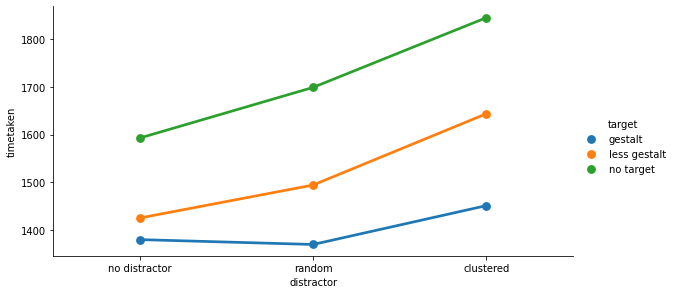

In [248]:
plt.figure(figsize=(11,2))
chart = sns.catplot(x="distractor", y="timetaken", hue="target", data=datadf, kind="point",
                      order=["no distractor","random","clustered"],
                      hue_order=["gestalt","less gestalt","no target"], ci=None, height=4, aspect=2)


<Figure size 792x144 with 0 Axes>

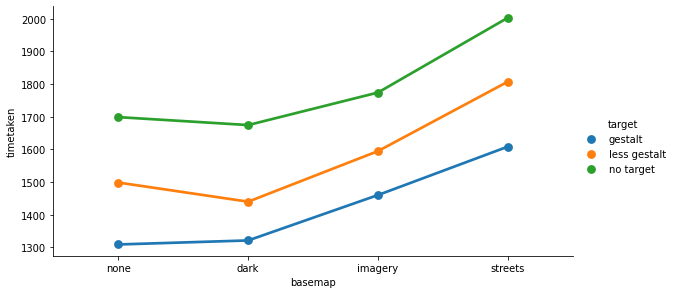

In [60]:
plt.figure(figsize=(11,2))
chart = sns.catplot(x="basemap", y="timetaken", hue="target", data=datadf, kind="point",
                      order=["none", "dark", "imagery", "streets"],
                      hue_order=["gestalt","less gestalt","no target"], ci=None, height=4, aspect=2)

<Figure size 792x144 with 0 Axes>

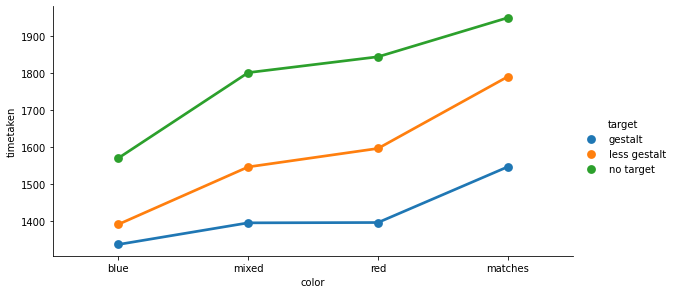

In [62]:
plt.figure(figsize=(11,2))
chart = sns.catplot(x="color", y="timetaken", hue="target", data=datadf, kind="point",
                      order=["blue","mixed","red","matches"],
                      hue_order=["gestalt","less gestalt","no target"], ci=None, height=4, aspect=2)

<Figure size 1080x360 with 0 Axes>

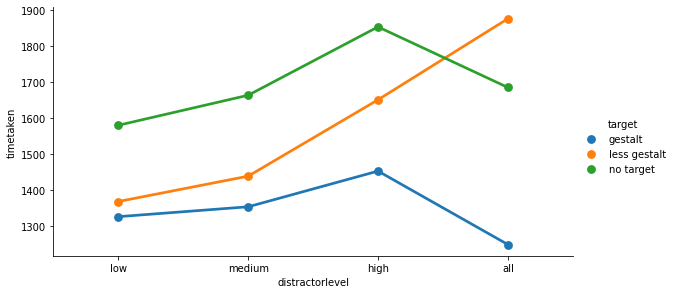

In [58]:
dflim = datadf.loc[datadf['distractor'] == 'random']

plt.figure(figsize=(15,5))
chart = sns.catplot(x="distractorlevel", y="timetaken", hue="target", data=dflim, kind="point",
                    hue_order=["gestalt","less gestalt","no target"],
                    order=["low","medium","high","all"],
                    ci=None,height=4, aspect=2)
sns.reset_orig()

<Figure size 1080x360 with 0 Axes>

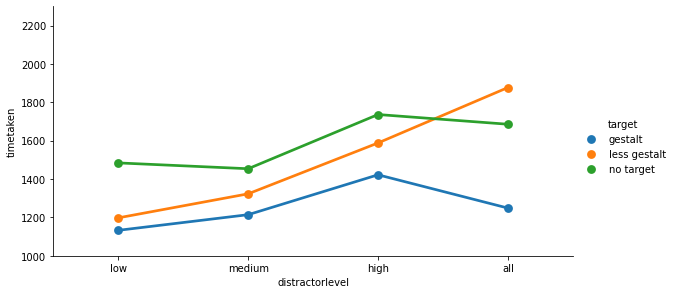

In [150]:
chart = plotDistractorByBasemap('random', 'none')

<Figure size 1080x360 with 0 Axes>

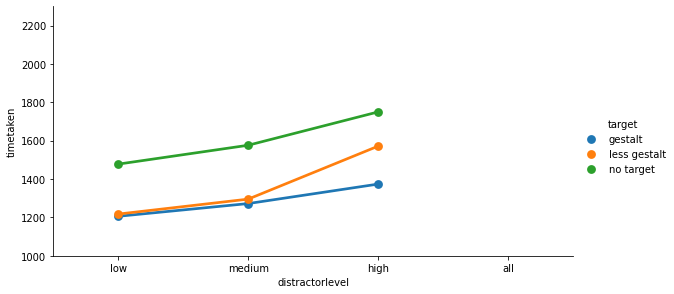

In [151]:
chart = plotDistractorByBasemap('random', 'dark')

<Figure size 1080x360 with 0 Axes>

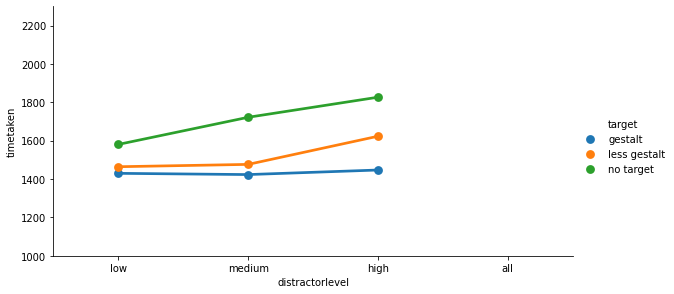

In [152]:
chart = plotDistractorByBasemap('random', 'imagery')

<Figure size 1080x360 with 0 Axes>

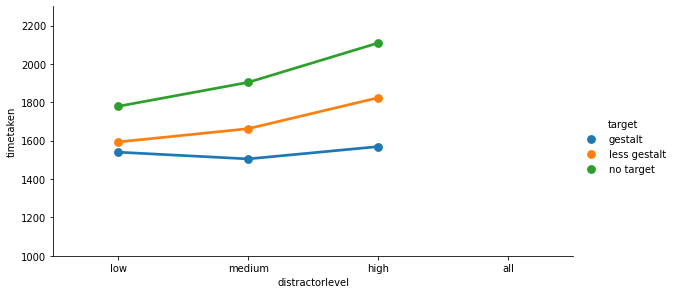

In [153]:
chart = plotDistractorByBasemap('random', 'streets')

<Figure size 1080x360 with 0 Axes>

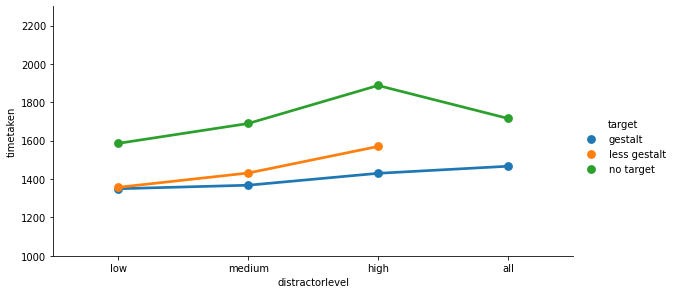

In [154]:
chart = plotDistractorByColor('random', 'mixed')

<Figure size 1080x360 with 0 Axes>

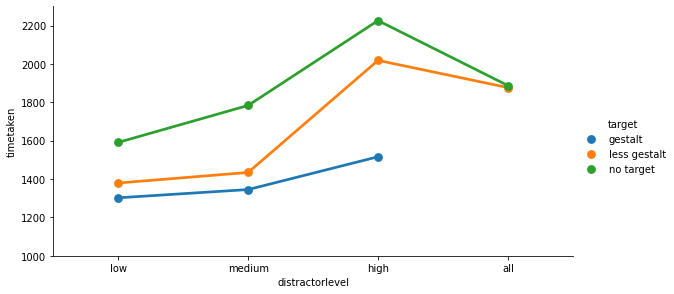

In [155]:
chart = plotDistractorByColor('random', 'matches')

<Figure size 1080x360 with 0 Axes>

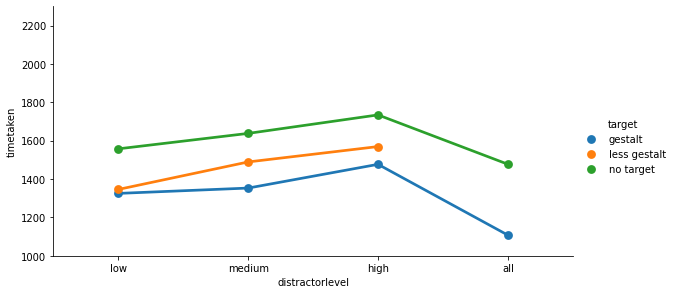

In [156]:
chart = plotDistractorByColor('random', 'red')

<Figure size 1080x360 with 0 Axes>

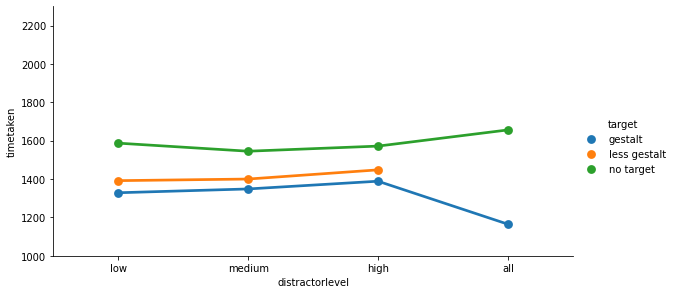

In [157]:
chart = plotDistractorByColor('random', 'blue')

<Figure size 1080x360 with 0 Axes>

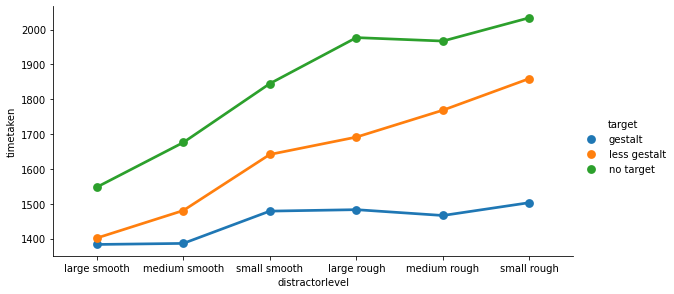

In [158]:
dflim = datadf.loc[datadf['distractor'] == 'clustered']

plt.figure(figsize=(15,5))
chart = sns.catplot(x="distractorlevel", y="timetaken", hue="target", data=dflim, kind="point",
                    hue_order=["gestalt","less gestalt","no target"],
                    order=["large smooth","medium smooth","small smooth","large rough","medium rough","small rough"],
                    ci=None,height=4, aspect=2)

<Figure size 1080x360 with 0 Axes>

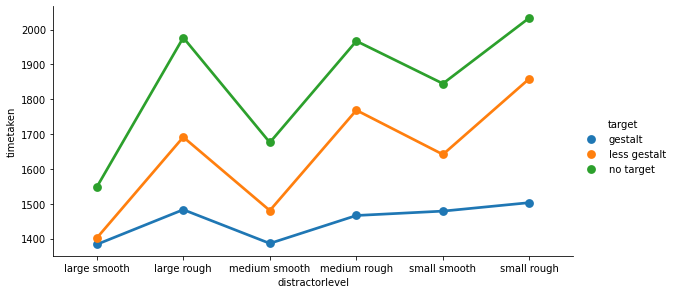

In [159]:
dflim = datadf.loc[datadf['distractor'] == 'clustered']

plt.figure(figsize=(15,5))
chart = sns.catplot(x="distractorlevel", y="timetaken", hue="target", data=dflim, kind="point",
                    hue_order=["gestalt","less gestalt","no target"],
                    order=["large smooth","large rough","medium smooth","medium rough","small smooth","small rough"],
                    ci=None,height=4, aspect=2)

<Figure size 1080x360 with 0 Axes>

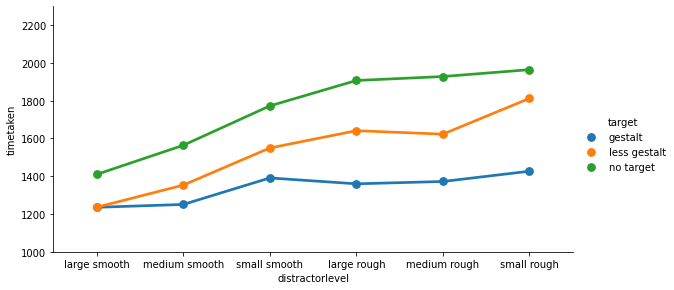

In [171]:
chart = plotDistractorByBasemap('clustered', 'none')


<Figure size 1080x360 with 0 Axes>

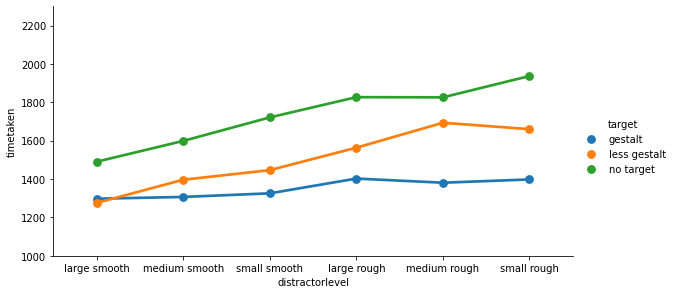

In [172]:
chart = plotDistractorByBasemap('clustered', 'dark')


<Figure size 1080x360 with 0 Axes>

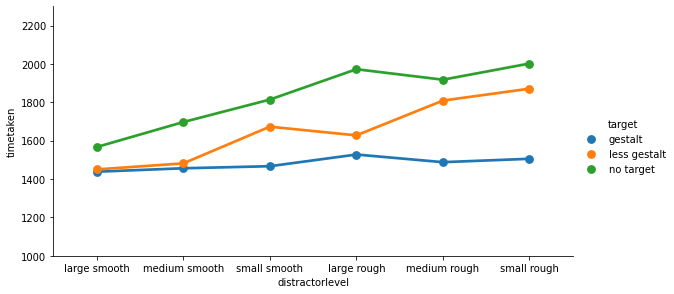

In [173]:
chart = plotDistractorByBasemap('clustered', 'imagery')


<Figure size 1080x360 with 0 Axes>

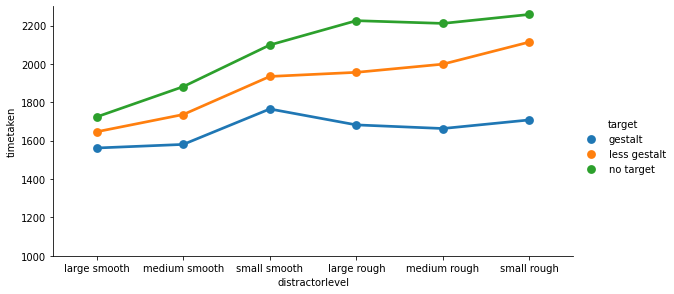

In [174]:
chart = plotDistractorByBasemap('clustered', 'streets')


<Figure size 1080x360 with 0 Axes>

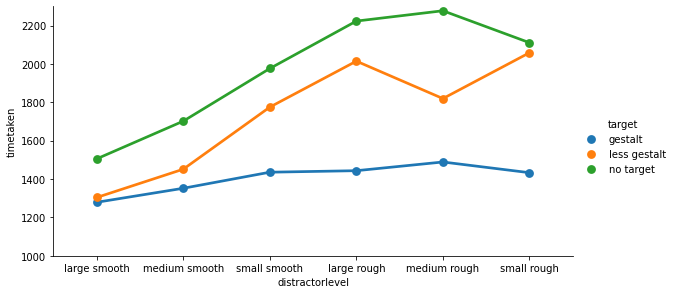

In [175]:
chart = plotDistractorByColor('clustered', 'mixed')


<Figure size 1080x360 with 0 Axes>

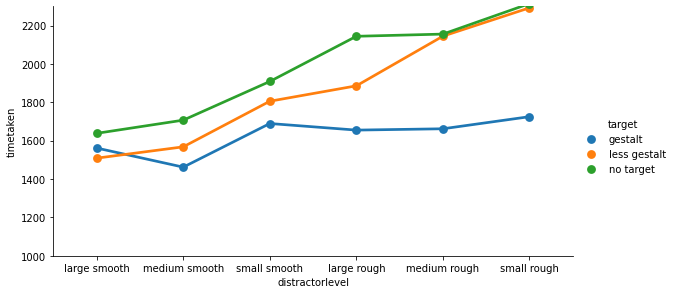

In [176]:
chart = plotDistractorByColor('clustered', 'matches')


<Figure size 1080x360 with 0 Axes>

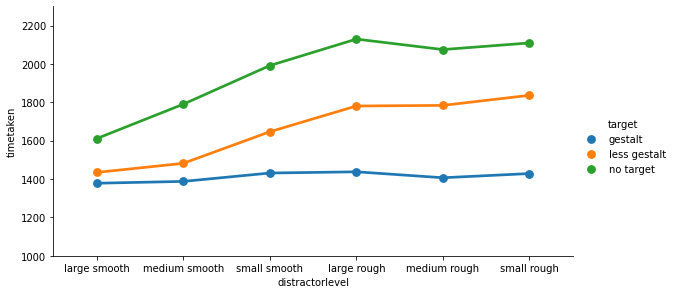

In [177]:
chart = plotDistractorByColor('clustered', 'red')


<Figure size 1080x360 with 0 Axes>

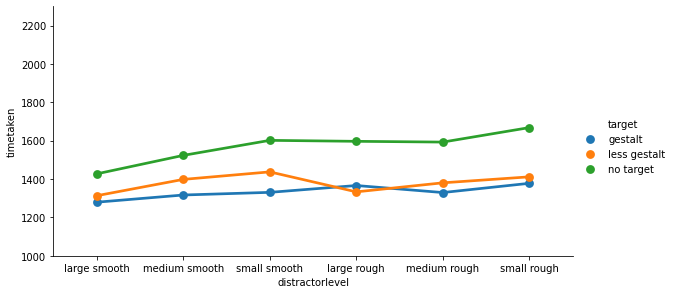

In [178]:
chart = plotDistractorByColor('clustered', 'blue')


<Figure size 1080x360 with 0 Axes>

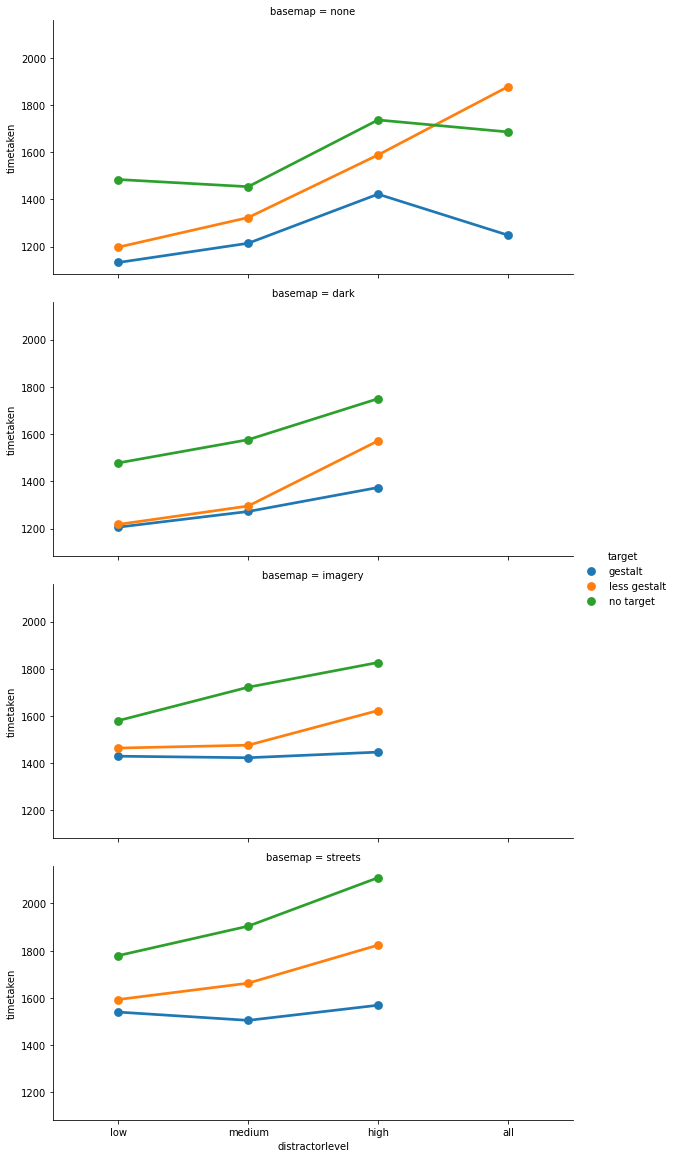

In [168]:
dflim = datadf.loc[datadf['distractor'] == 'random']

plt.figure(figsize=(15,5))
chart = sns.catplot(x="distractorlevel", y="timetaken", hue="target", row="basemap", data=dflim, kind="point",
                    hue_order=["gestalt","less gestalt","no target"],
                    row_order=["none", "dark", "imagery", "streets"],
                    order=["low","medium","high","all"],
                    ci=None,height=4, aspect=2)
sns.reset_orig()

<Figure size 1080x360 with 0 Axes>

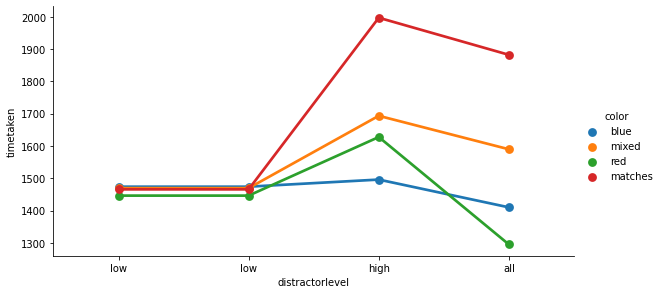

In [169]:
dflim = datadf.loc[datadf['distractor'] == 'random']

plt.figure(figsize=(15,5))
chart = sns.catplot(x="distractorlevel", y="timetaken", hue="color", data=dflim, kind="point",
                    hue_order=["blue","mixed","red","matches"],
                    order=["low","low", "high","all"],
                    ci=None,height=4, aspect=2)
sns.reset_orig()

<Figure size 1080x360 with 0 Axes>

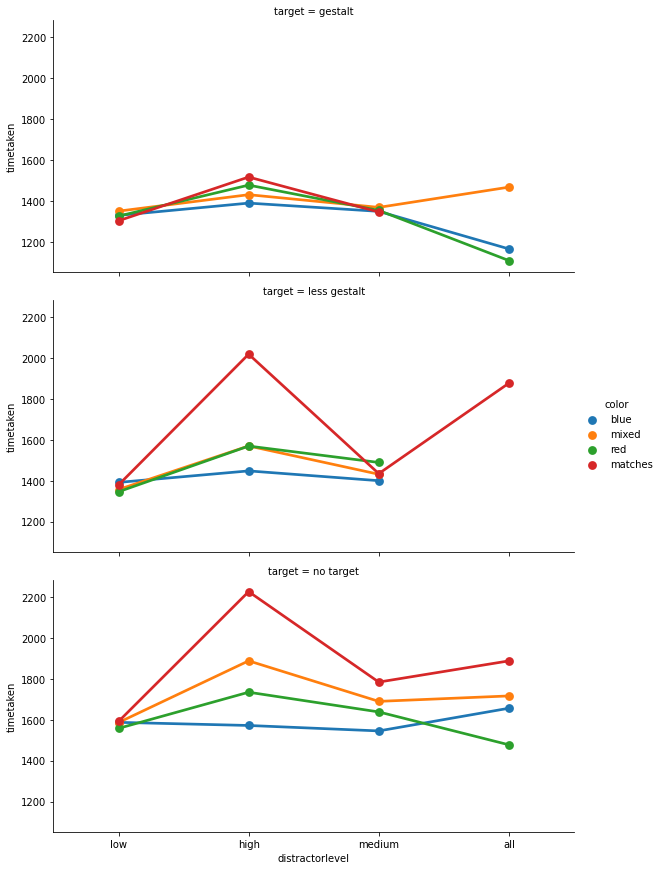

In [12]:
dflim = datadf.loc[datadf['distractor'] == 'random']

plt.figure(figsize=(15,5))
chart = sns.catplot(x="distractorlevel", y="timetaken", hue="color", row="target", data=dflim, kind="point",
                    hue_order=["blue","mixed","red","matches"],
                    row_order=["gestalt","less gestalt","no target"],
                    order=["low", "high","medium","all"],
                    ci=None,height=4, aspect=2)
sns.reset_orig()

<Figure size 1080x360 with 0 Axes>

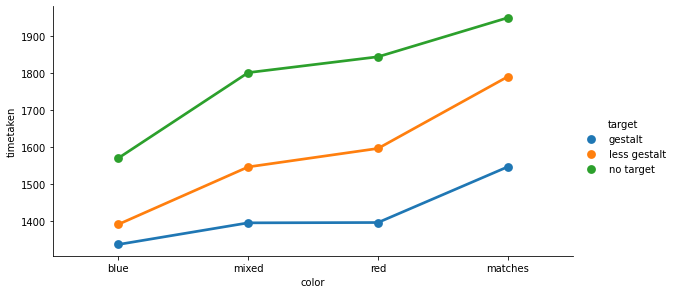

In [13]:
plt.figure(figsize=(15,5))
chart = sns.catplot(x="color", y="timetaken", hue="target", data=datadf, kind="point",
                      order=["blue","mixed","red","matches"],
                      hue_order=["gestalt","less gestalt","no target"], ci=None, height=4, aspect=2)


<Figure size 1080x360 with 0 Axes>

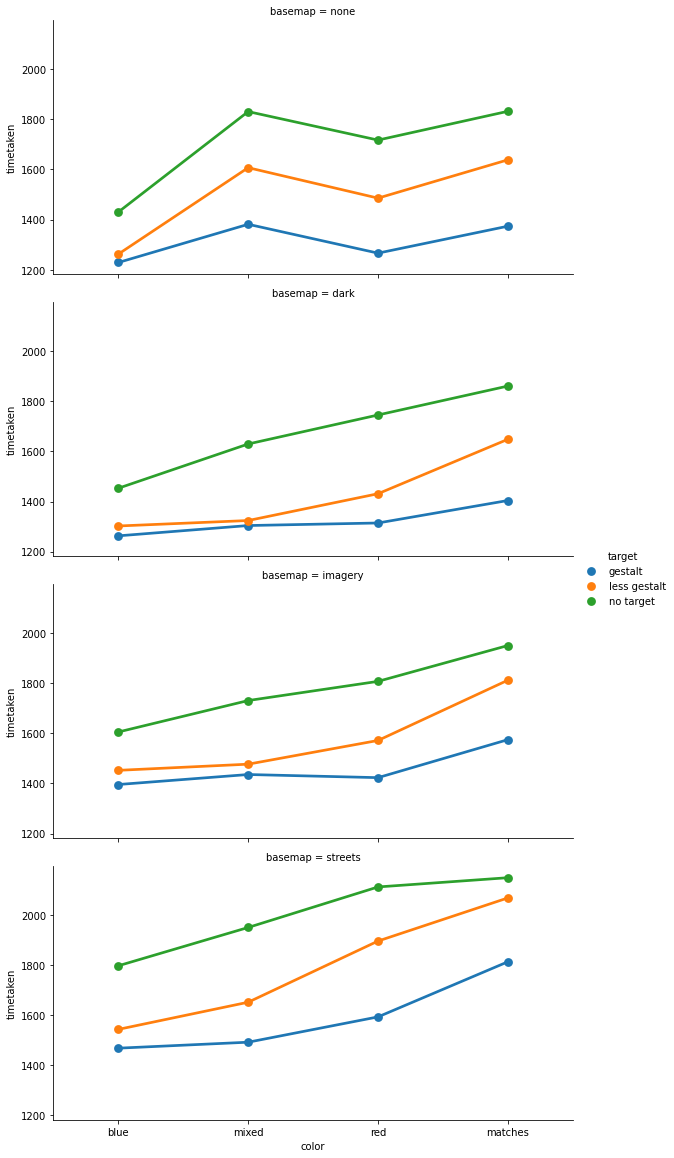

In [69]:
plt.figure(figsize=(15,5))
chart = sns.catplot(x="color", y="timetaken", hue="target", row="basemap", data=datadf, kind="point",
                    order=["blue","mixed","red","matches"],
                    row_order=["none", "dark", "imagery", "streets"],
                    hue_order=["gestalt","less gestalt","no target"], ci=None, height=4, aspect=2)

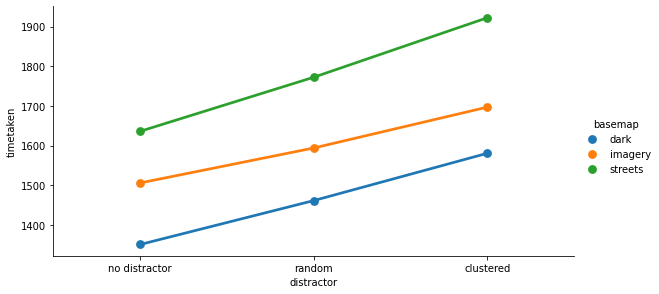

In [16]:
# dflim = datadf.loc[datadf['basemap'] != 'none']

chart = sns.catplot(x="distractor", y="timetaken", hue="basemap", data=datadf, kind="point", 
                    order=["no distractor","random","clustered"],
                    hue_order=["dark","imagery","streets"],
                    ci=None, height=4, aspect=2)

<Figure size 1080x360 with 0 Axes>

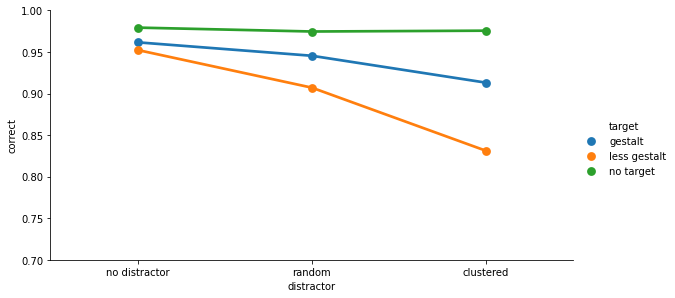

In [25]:
plt.figure(figsize=(15,5))
chart = sns.catplot(x="distractor", y="correct", hue="target", data=datadf, kind="point",
                      order=["no distractor","random","clustered"],
                      hue_order=["gestalt","less gestalt","no target"], ci=None, height=4, aspect=2)

chart.set(ylim=((.7, 1)))


<Figure size 1080x360 with 0 Axes>

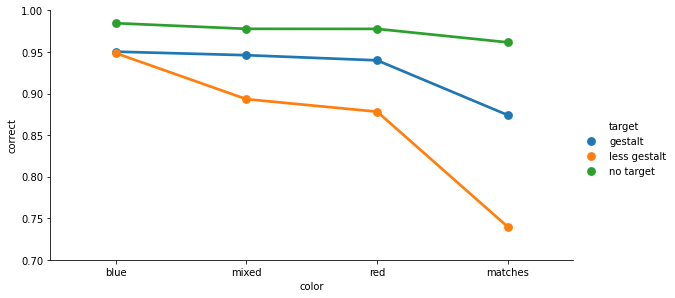

In [24]:
plt.figure(figsize=(15,5))
chart = sns.catplot(x="color", y="correct", hue="target", data=datadf, kind="point",
                      order=["blue","mixed","red","matches"],
                      hue_order=["gestalt","less gestalt","no target"], ci=None, height=4, aspect=2)

chart.set(ylim=((.70, 1)))

<Figure size 1080x360 with 0 Axes>

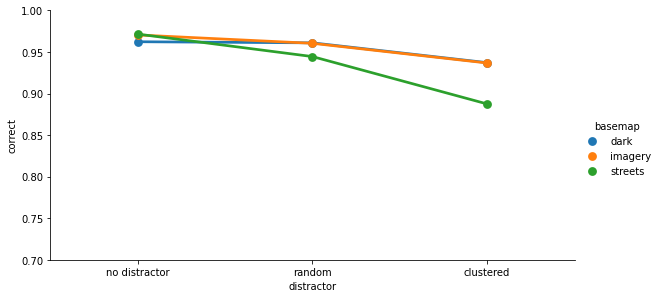

In [26]:
plt.figure(figsize=(15,5))
chart = sns.catplot(x="distractor", y="correct", hue="basemap", data=datadf, kind="point",
                      order=["no distractor","random","clustered"],
                     hue_order=["dark","imagery","streets"], ci=None, height=4, aspect=2)

chart.set(ylim=((.7, 1)))

<Figure size 1080x360 with 0 Axes>

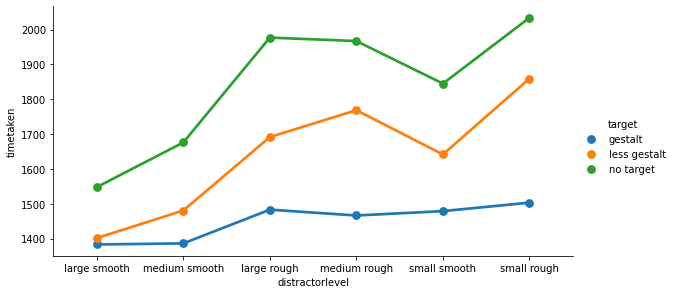

In [15]:
dflim = datadf.loc[datadf['distractor'] == 'clustered']

plt.figure(figsize=(15,5))
chart = sns.catplot(x="distractorlevel", y="timetaken", hue="target", data=dflim, kind="point",
                    hue_order=["gestalt","less gestalt","no target"],
                    order=["large smooth","medium smooth","large rough","medium rough","small smooth","small rough"],
                    ci=None,height=4, aspect=2)
sns.reset_orig()

<Figure size 1080x360 with 0 Axes>

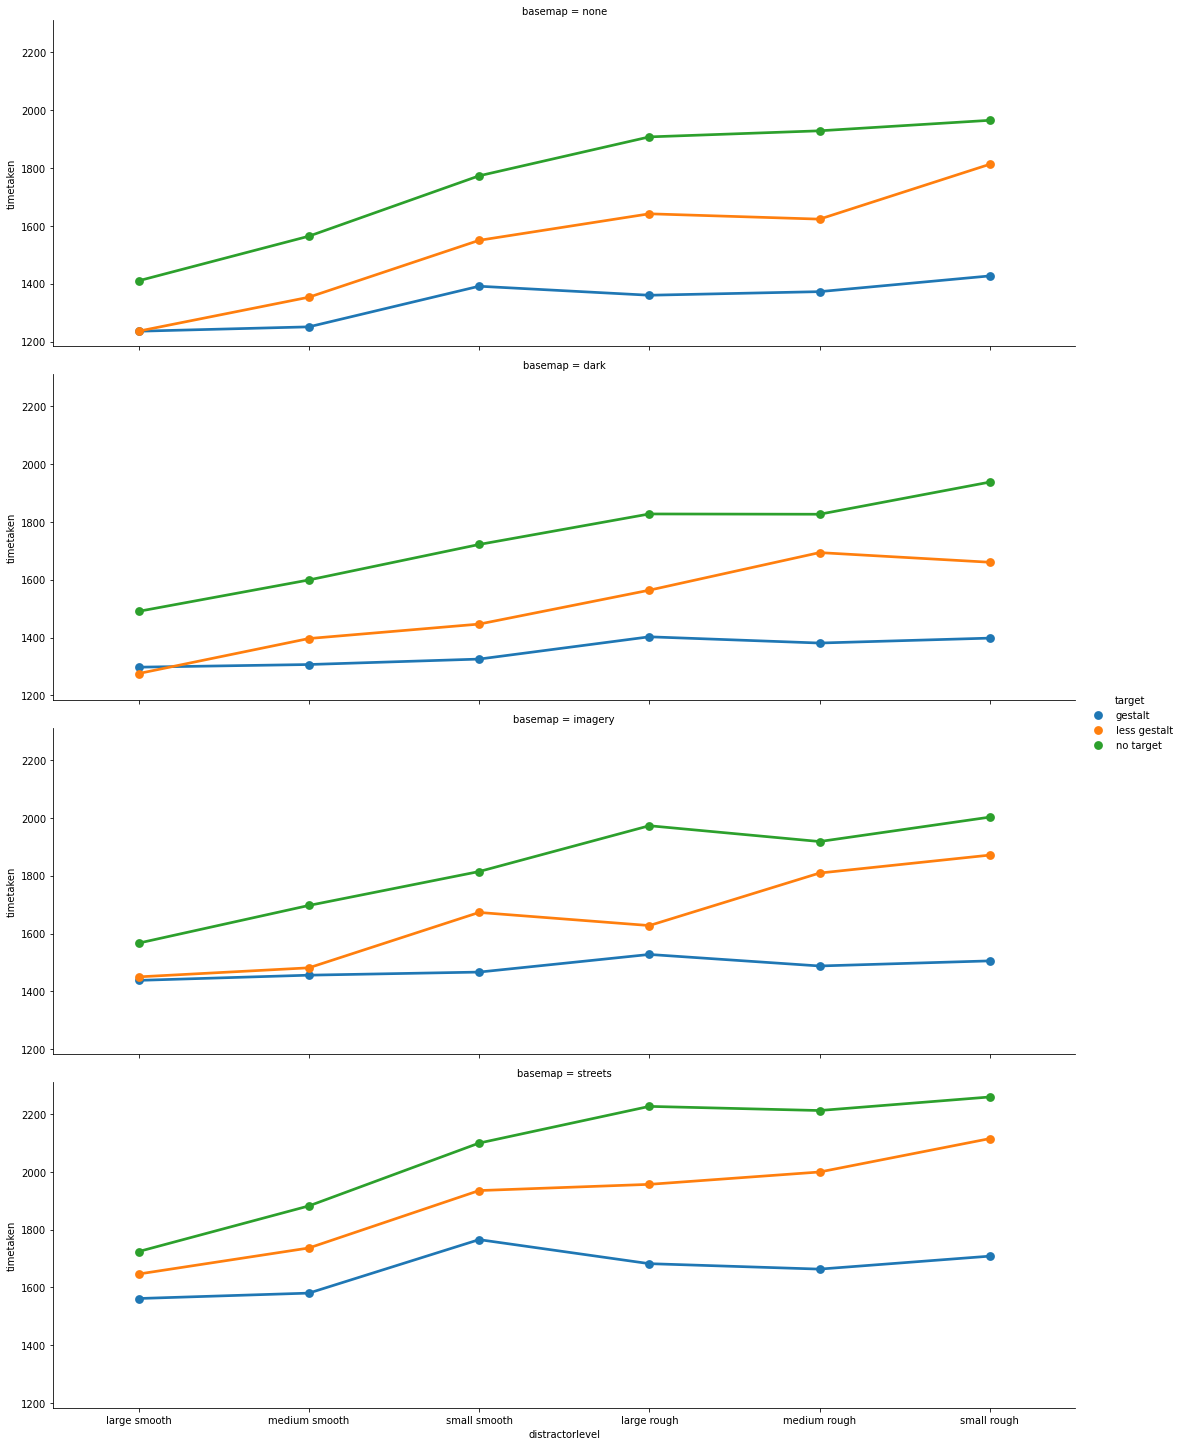

In [14]:
dflim = datadf.loc[datadf['distractor'] == 'clustered']
plt.figure(figsize=(15,5))
chart = sns.catplot(x="distractorlevel", y="timetaken", hue="target", data=dflim, row="basemap", kind="point",
                    hue_order=["gestalt","less gestalt","no target"],
                    row_order=["none", "dark", "imagery", "streets"],
                    order=["large smooth","medium smooth","small smooth","large rough","medium rough","small rough"],
                    ci=None,height=5, aspect=3)
sns.reset_orig()


<Figure size 1080x360 with 0 Axes>

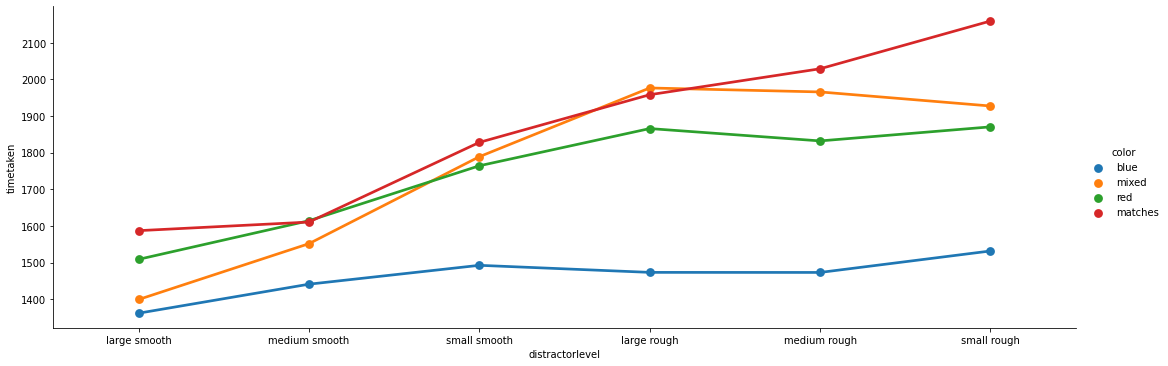

In [15]:
dflim = datadf.loc[datadf['distractor'] == 'clustered']

plt.figure(figsize=(15,5))
chart = sns.catplot(x="distractorlevel", y="timetaken", hue="color", data=dflim, kind="point",
                    hue_order=["blue","mixed","red","matches"],
                    order=["large smooth","medium smooth","small smooth","large rough","medium rough","small rough"],
                    ci=None,height=5, aspect=3)
sns.reset_orig()

<Figure size 1080x360 with 0 Axes>

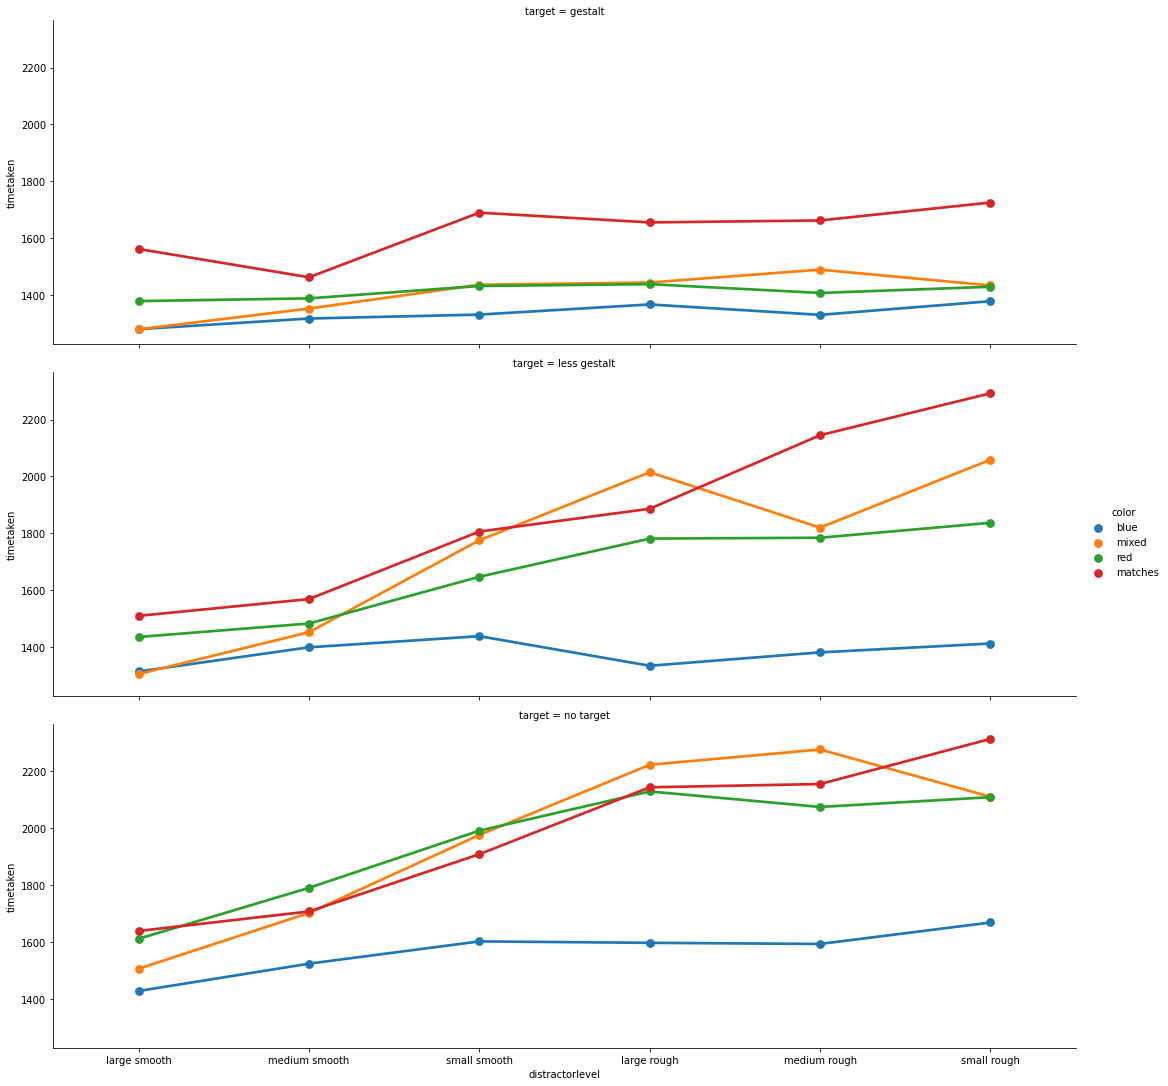

In [16]:
dflim = datadf.loc[datadf['distractor'] == 'clustered']

plt.figure(figsize=(15,5))
chart = sns.catplot(x="distractorlevel", y="timetaken", hue="color", row='target', data=dflim, kind="point",
                    hue_order=["blue","mixed","red","matches"],
                    row_order=["gestalt","less gestalt","no target"],
                    order=["large smooth","medium smooth","small smooth","large rough","medium rough","small rough"],
                    ci=None,height=5, aspect=3)
sns.reset_orig()

<Figure size 1080x360 with 0 Axes>

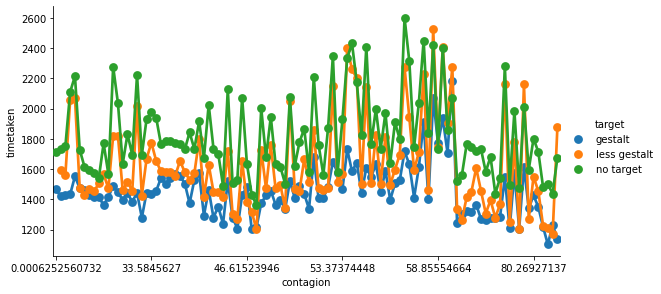

In [289]:
chart = plotMetric('contagion')



<Figure size 1080x360 with 0 Axes>

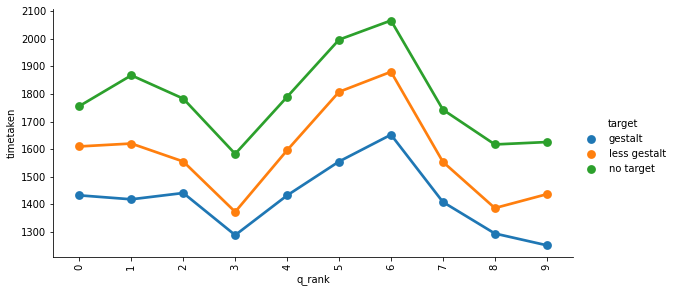

In [287]:
chart = plotMetricq('contagion')


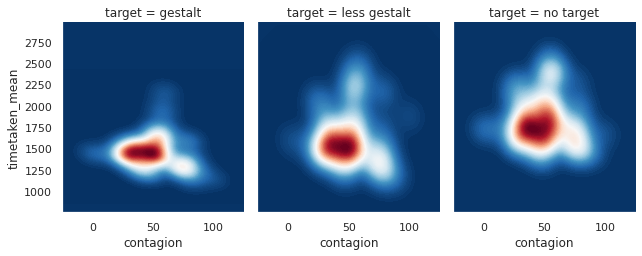

In [288]:
chart = plotKDEMetric('contagion')

<Figure size 1080x360 with 0 Axes>

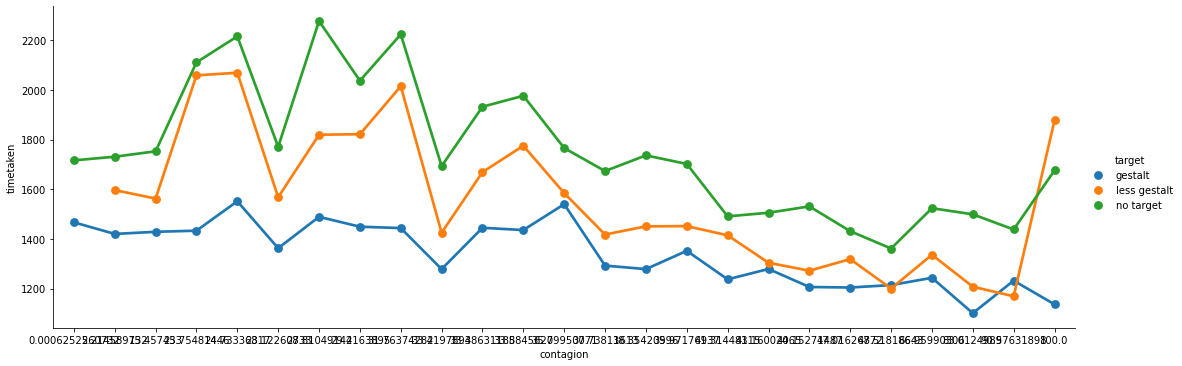

In [67]:
chart = plotMetricByBasemap('contagion','none')


<Figure size 1080x360 with 0 Axes>

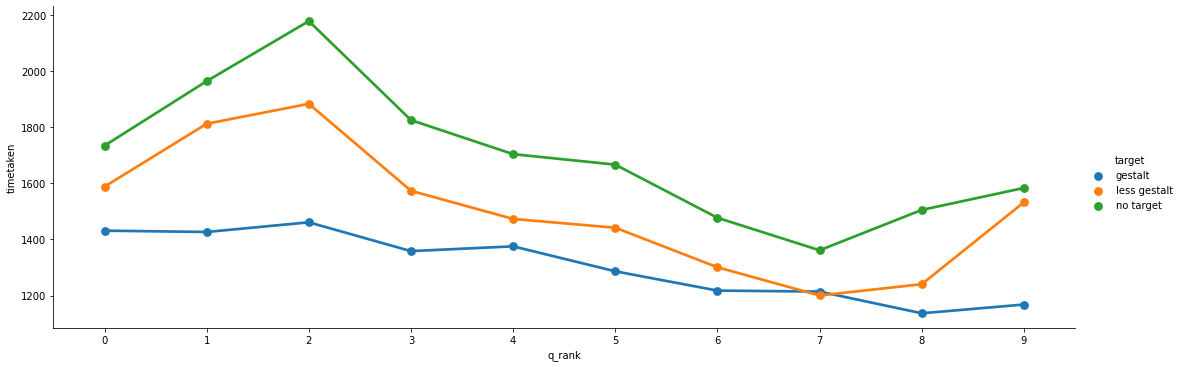

In [69]:
chart = plotMetricByBasemapq('contagion','none')


<Figure size 1080x360 with 0 Axes>

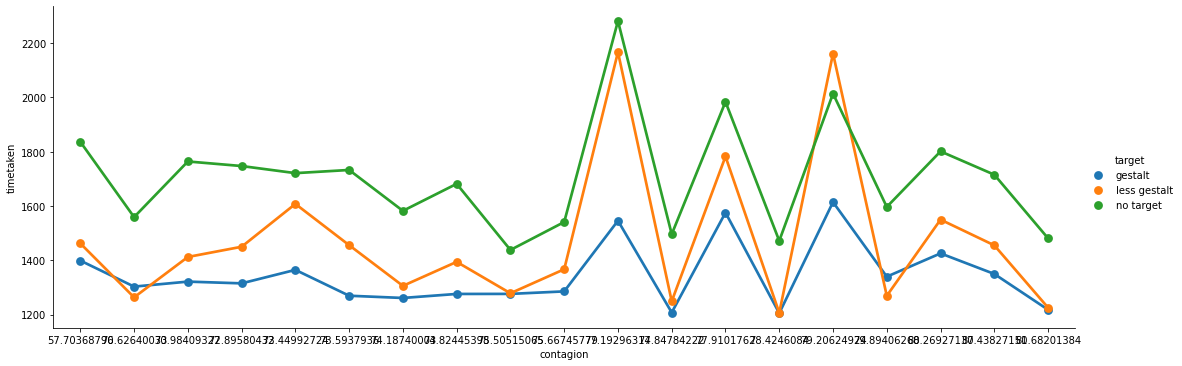

In [70]:
chart = plotMetricByBasemap('contagion','dark')

<Figure size 1080x360 with 0 Axes>

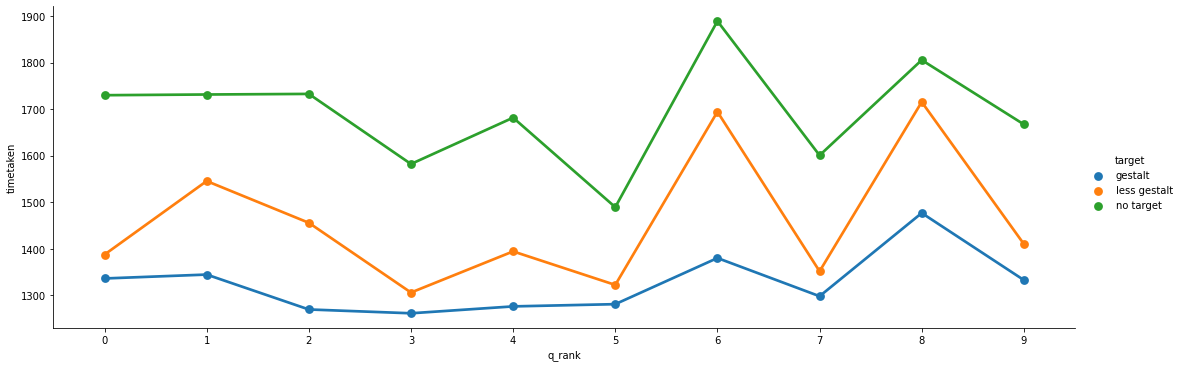

In [64]:
chart = plotMetricByBasemapq('contagion','dark')

<Figure size 1080x360 with 0 Axes>

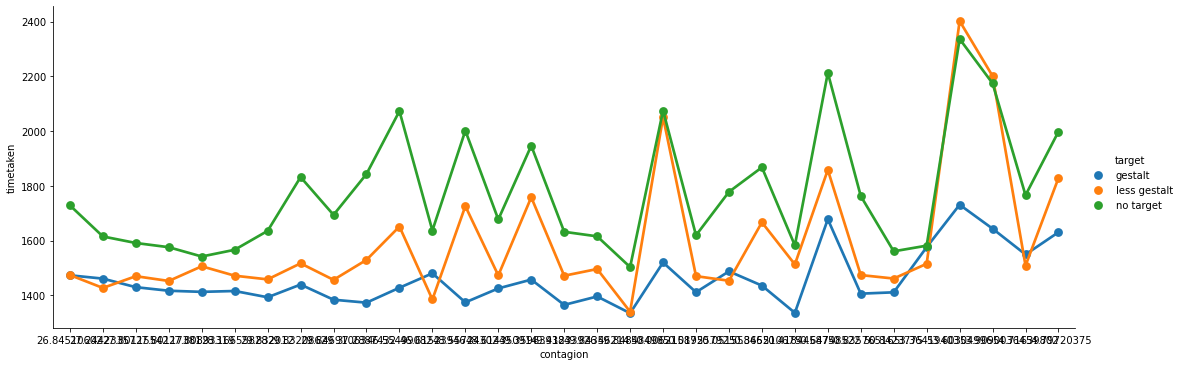

In [71]:
chart = plotMetricByBasemap('contagion','imagery')

<Figure size 1080x360 with 0 Axes>

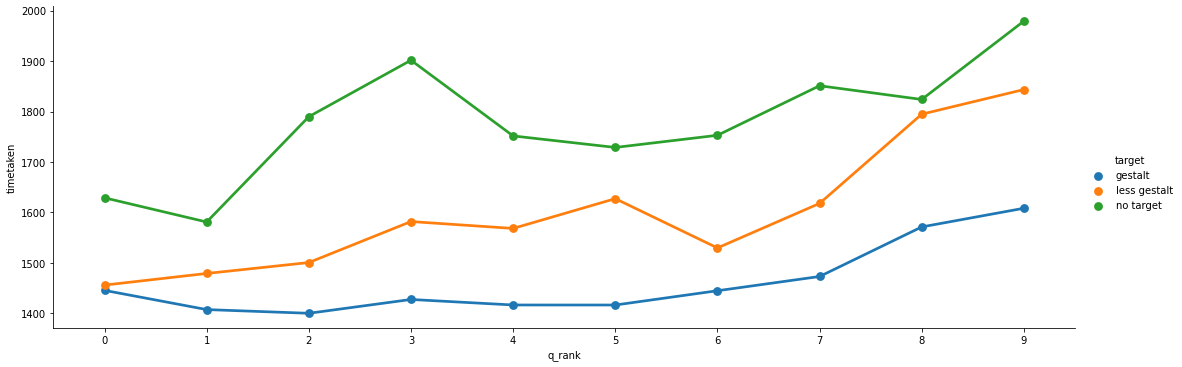

In [72]:
chart = plotMetricByBasemapq('contagion','imagery')

<Figure size 1080x360 with 0 Axes>

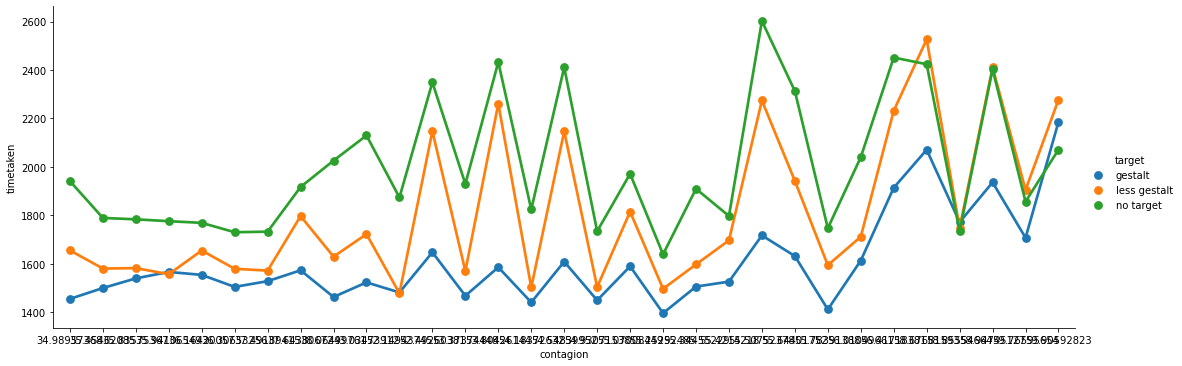

In [73]:
chart = plotMetricByBasemap('contagion','streets')

<Figure size 1080x360 with 0 Axes>

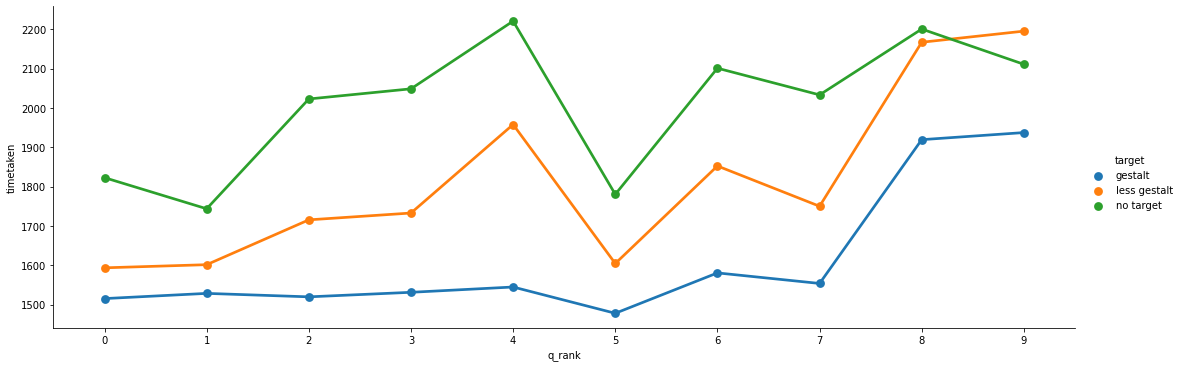

In [74]:
chart = plotMetricByBasemapq('contagion','streets')

<Figure size 1080x360 with 0 Axes>

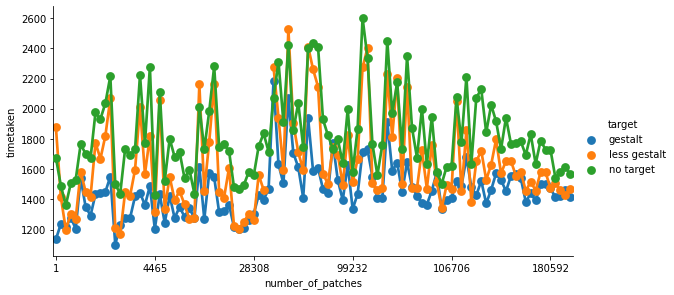

In [269]:
chart = plotMetric('number_of_patches')

<Figure size 1080x360 with 0 Axes>

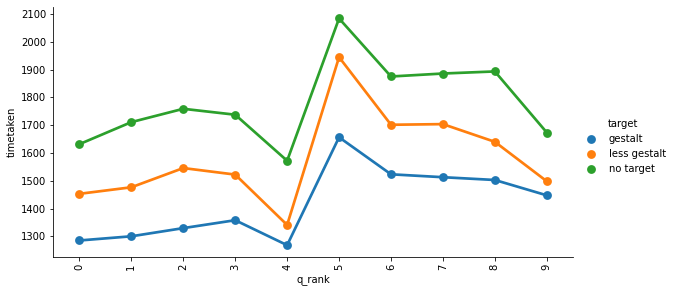

In [270]:
chart = plotMetricq('number_of_patches')


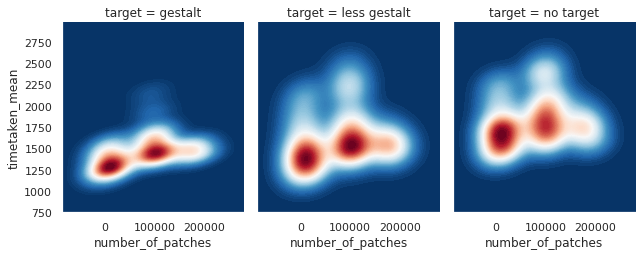

In [273]:
chart = plotKDEMetric('number_of_patches')

<Figure size 1080x360 with 0 Axes>

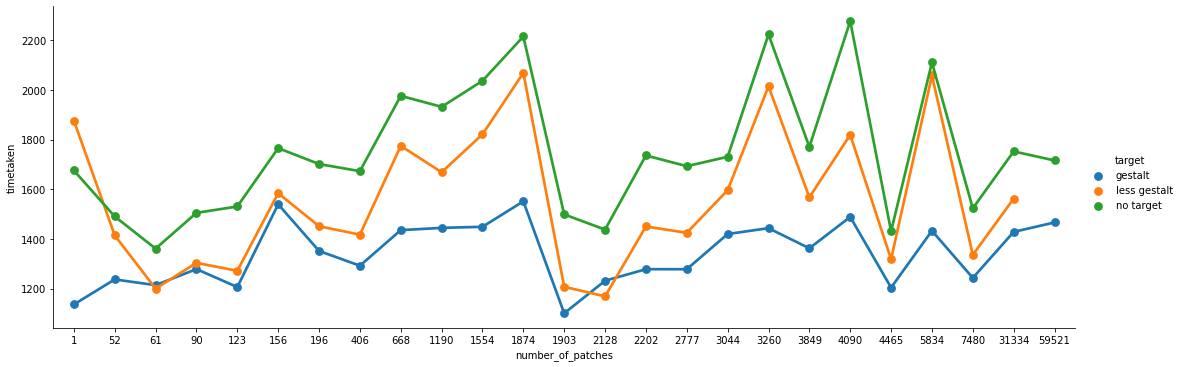

In [29]:
chart = plotMetricByBasemap('number_of_patches','none')

<Figure size 1080x360 with 0 Axes>

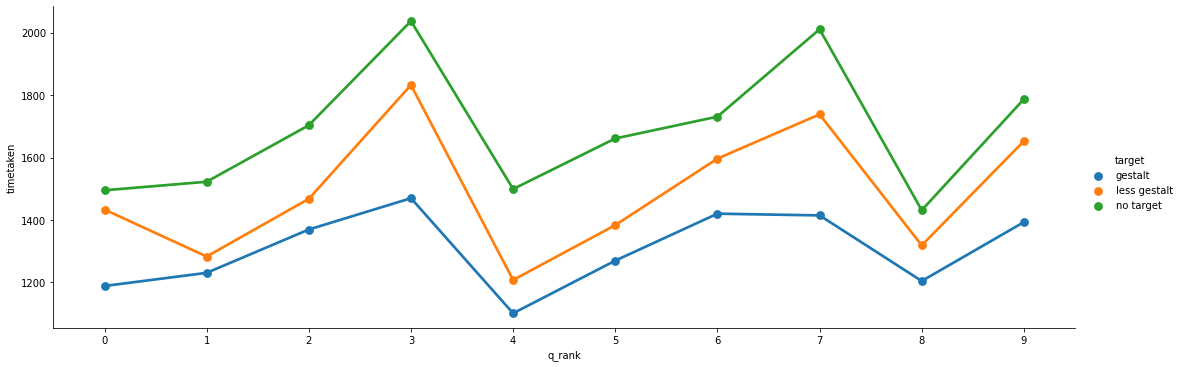

In [30]:
chart = plotMetricByBasemapq('number_of_patches','none')

<Figure size 1080x360 with 0 Axes>

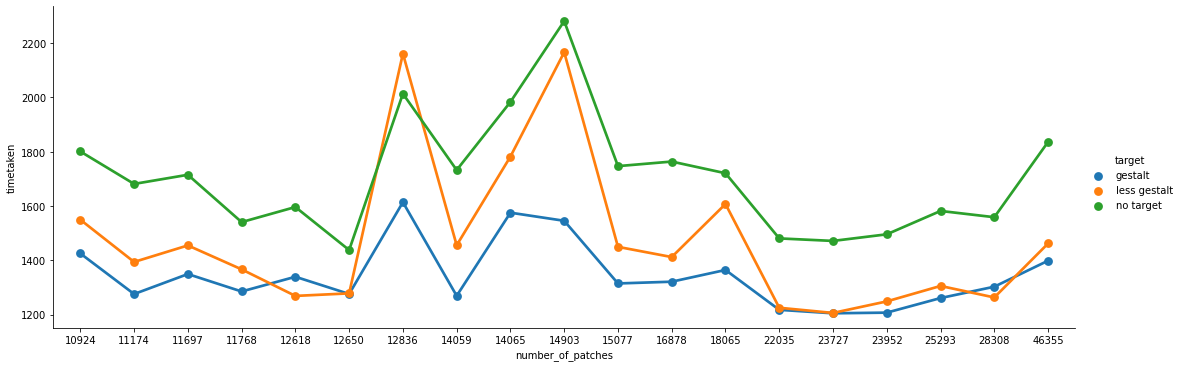

In [31]:
chart = plotMetricByBasemap('number_of_patches','dark')

<Figure size 1080x360 with 0 Axes>

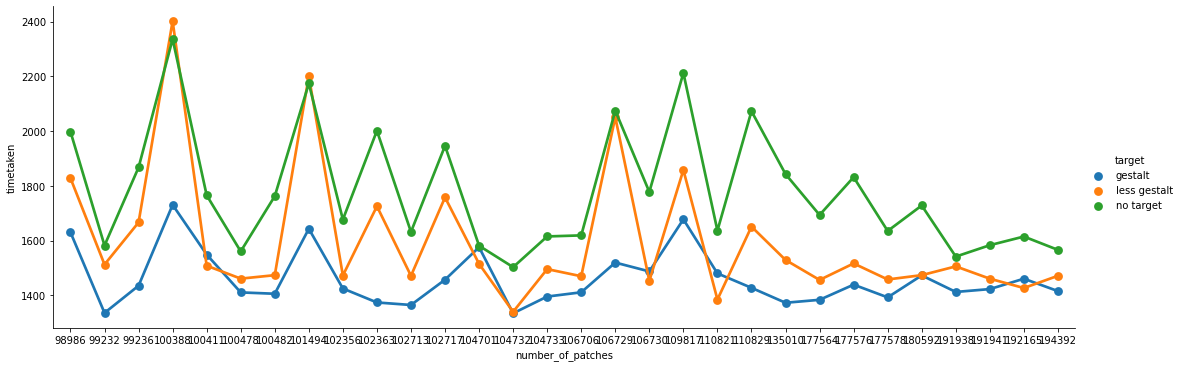

In [32]:
chart = plotMetricByBasemap('number_of_patches','imagery')

<Figure size 1080x360 with 0 Axes>

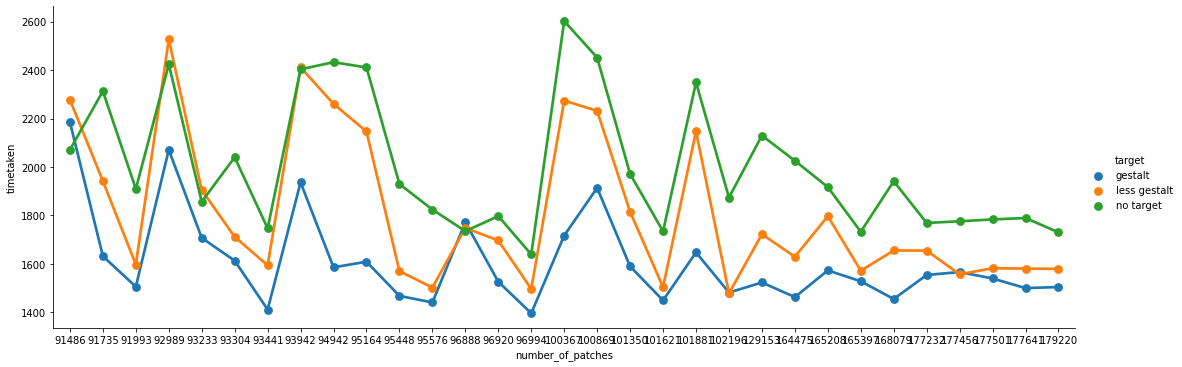

In [33]:
chart = plotMetricByBasemap('number_of_patches','streets')

<Figure size 1080x360 with 0 Axes>

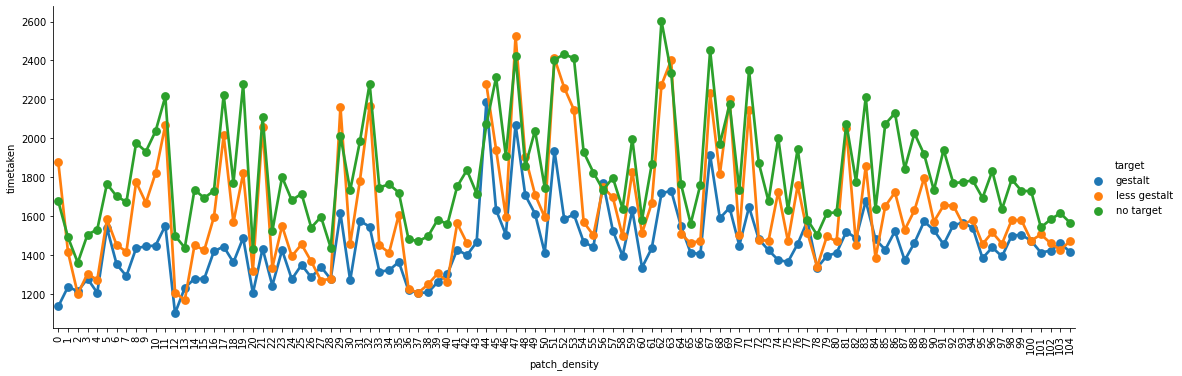

In [34]:
chart = plotMetric('patch_density')

In [35]:
chart = plotMetricq('patch_density')


<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

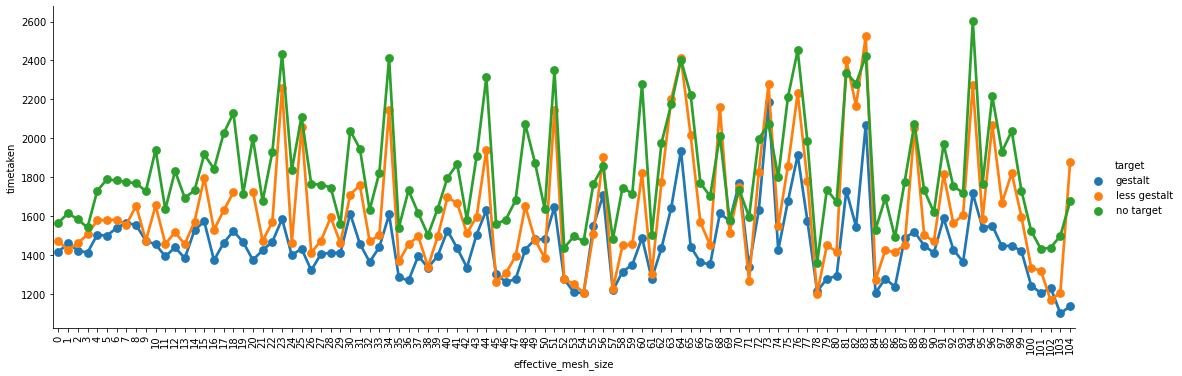

In [36]:
chart = plotMetric('effective_mesh_size')

<Figure size 1080x360 with 0 Axes>

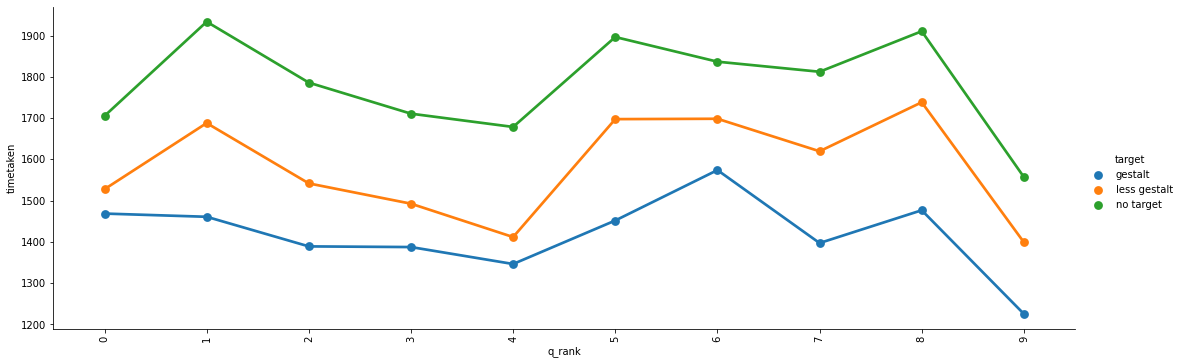

In [37]:
chart = plotMetricq('effective_mesh_size')


<Figure size 1080x360 with 0 Axes>

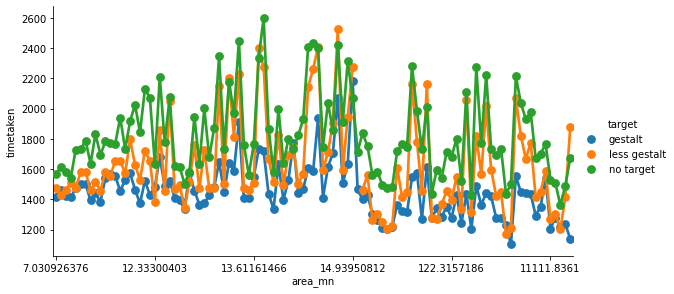

In [274]:
chart = plotMetric('area_mn')

<Figure size 1080x360 with 0 Axes>

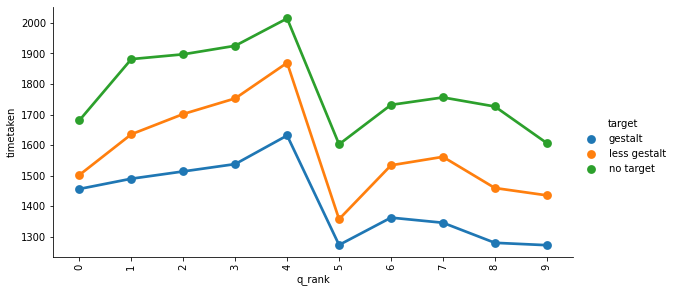

In [275]:
chart = plotMetricq('area_mn')


In [277]:
chart = plotKDEMetric('area_mn')

<Figure size 1080x360 with 0 Axes>

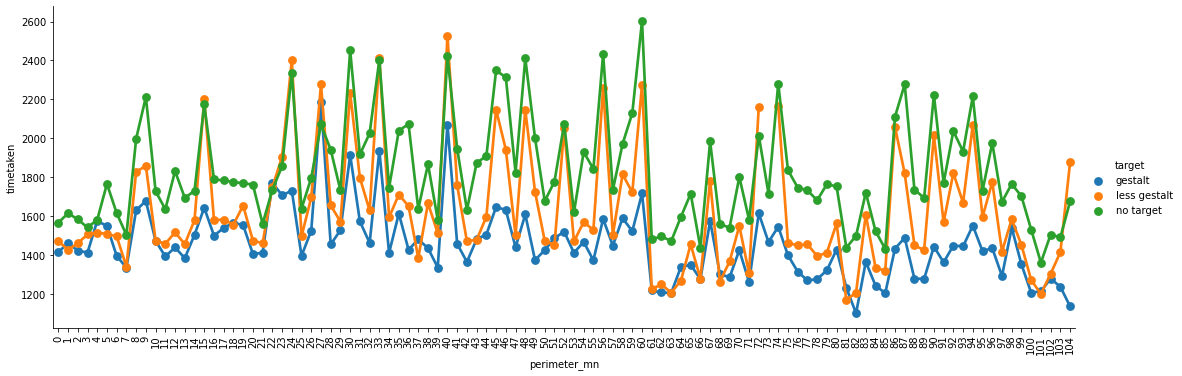

In [40]:
chart = plotMetric('perimeter_mn')

<Figure size 1080x360 with 0 Axes>

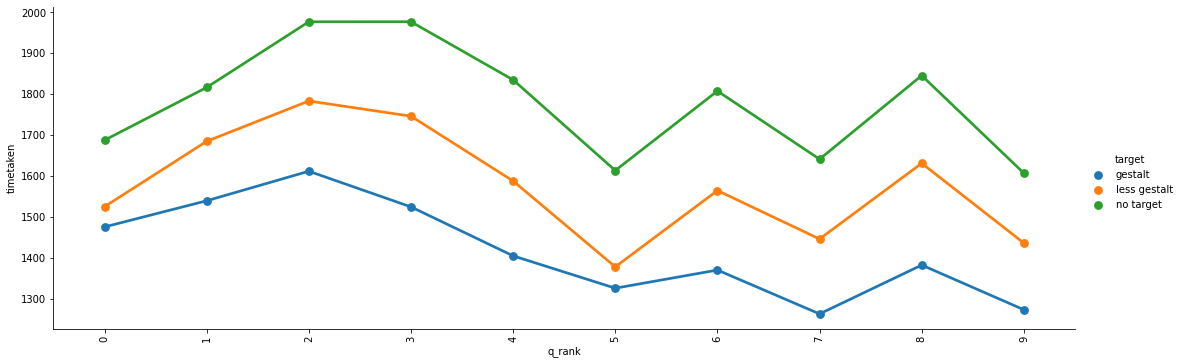

In [41]:
chart = plotMetricq('perimeter_mn')

<Figure size 1080x360 with 0 Axes>

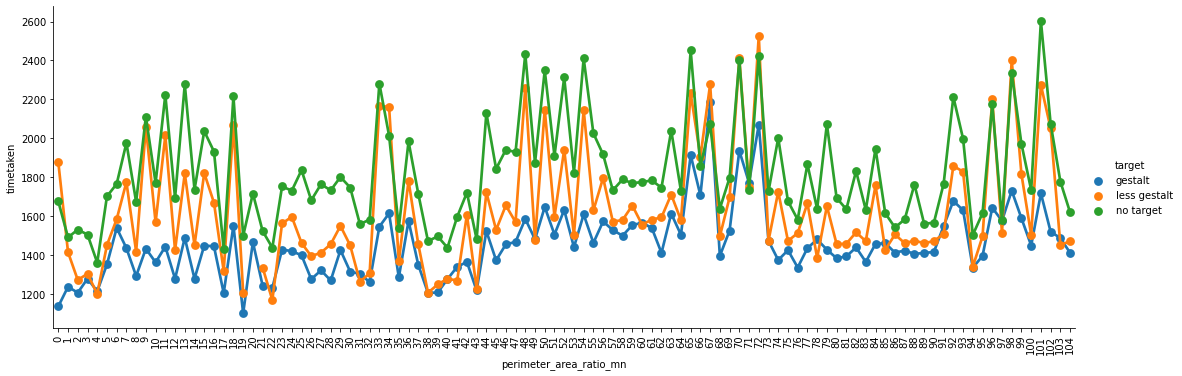

In [42]:
chart = plotMetric('perimeter_area_ratio_mn')

<Figure size 1080x360 with 0 Axes>

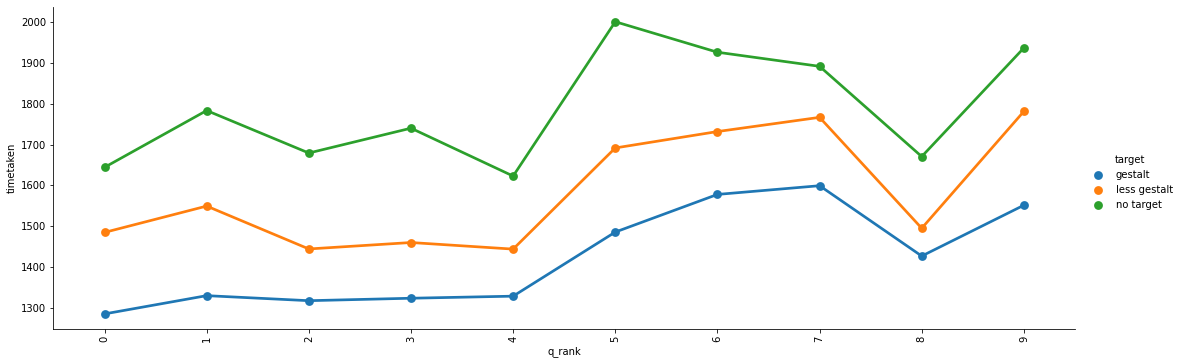

In [43]:
chart = plotMetricq('perimeter_area_ratio_mn')

<Figure size 1080x360 with 0 Axes>

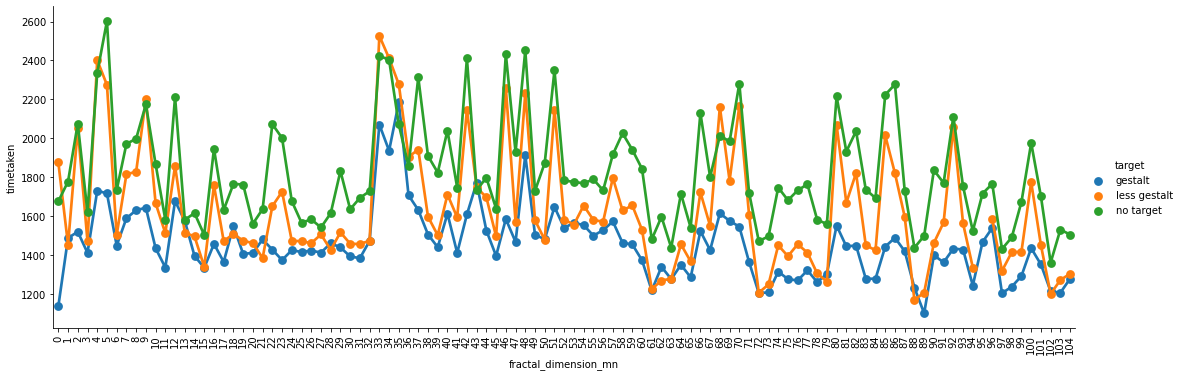

In [44]:
chart = plotMetric('fractal_dimension_mn')

<Figure size 1080x360 with 0 Axes>

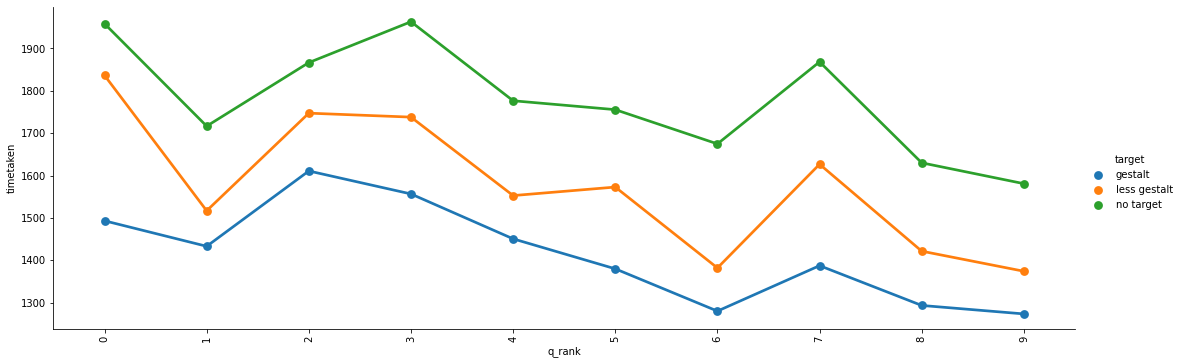

In [45]:
chart = plotMetricq('fractal_dimension_mn')

<Figure size 1080x360 with 0 Axes>

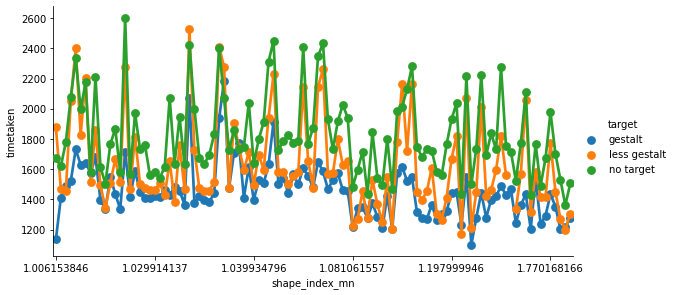

In [278]:
chart = plotMetric('shape_index_mn')

<Figure size 1080x360 with 0 Axes>

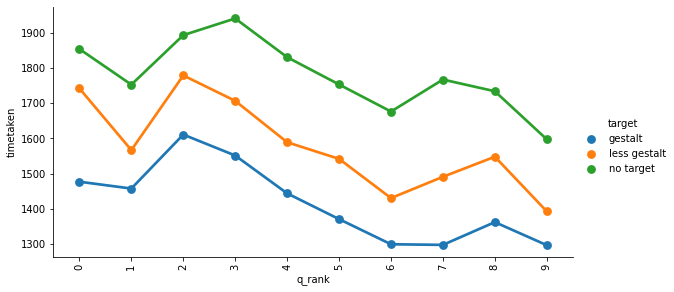

In [279]:
chart = plotMetricq('shape_index_mn')

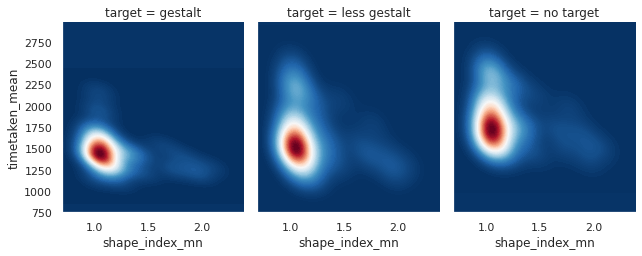

In [280]:
chart = plotKDEMetric('shape_index_mn')


<Figure size 1080x360 with 0 Axes>

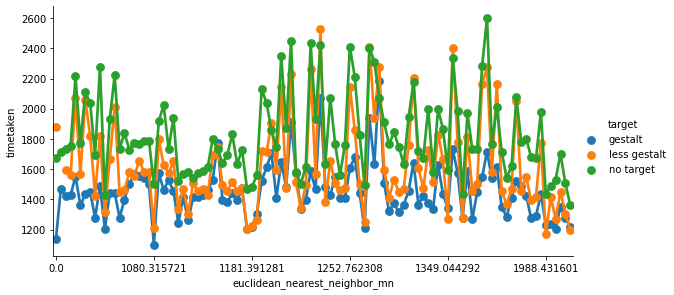

In [283]:
chart = plotMetric('euclidean_nearest_neighbor_mn')

<Figure size 1080x360 with 0 Axes>

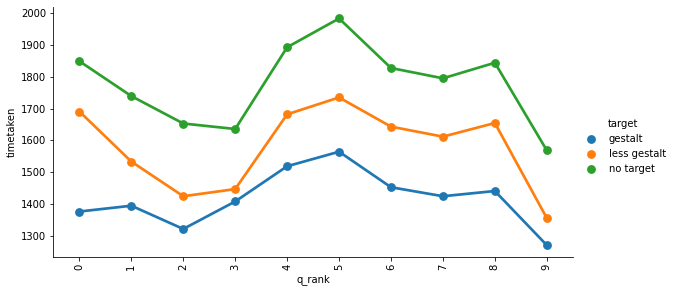

In [284]:
chart = plotMetricq('euclidean_nearest_neighbor_mn')

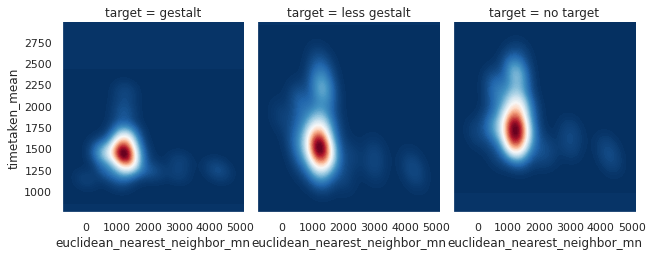

In [285]:
chart = plotKDEMetric('euclidean_nearest_neighbor_mn')


<Figure size 1080x360 with 0 Axes>

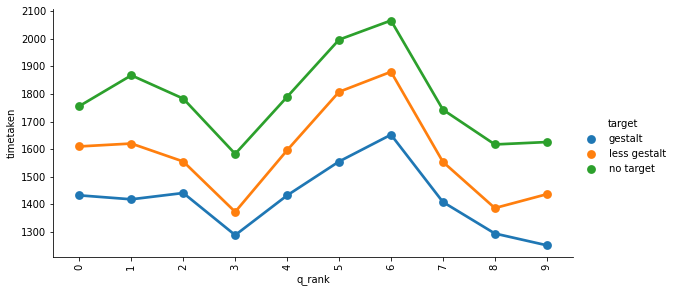

In [286]:
# chart = plotMetricByBasemapq('contagion','none')
chart = plotMetricq('contagion')


In [130]:
datadfLim = datadf # datadf.loc[datadf['basemap'] == 'none']
datadfLim = datadfLim.reset_index()  

datadfLim['q_rank'] = pd.qcut(datadfLim['contagion'], 10, labels = False) 
grouped_single = datadfLim.groupby(['target','q_rank']).agg({'contagion': ['min', 'max'],'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['q_rank', 'target','contagion_min', 'contagion_max', 'timetaken_mean', 'correct_mean']
    
grouped_single

q_rank  target  contagion_min  contagion_max  timetaken_mean  \
0        gestalt       0       0.000625      28.122607     1432.586304   
1        gestalt       1      28.166558      35.099501     1418.270056   
2        gestalt       2      35.454621      38.354206     1441.089734   
3        gestalt       3      39.971769      47.518186     1288.482001   
4        gestalt       4      48.557243      50.835765     1432.429383   
5        gestalt       5      50.842377      54.930715     1555.198110   
6        gestalt       6      55.070084      58.947451     1652.321576   
7        gestalt       7      59.765957      73.593794     1408.409602   
8        gestalt       8      74.187400      78.424608     1294.313269   
9        gestalt       9      79.206249     100.000000     1251.690433   
10  less gestalt       0       2.214590      28.122607     1609.791730   
11  less gestalt       1      28.166558      35.099501     1620.283135   
12  less gestalt       2      35.454621      38.354206     1555.138103   
13  less gestalt       3      39.971769      47.518186     1372.720183   
14  less gestalt       4      48.557243      50.835765     1596.045542   
15  less gestalt       5      50.842377      54.930715     1807.579854   
16  less gestalt       6      55.070084      58.947451     1880.193862   
17  less gestalt       7      59.765957      73.593794     1553.787553   
18  less gestalt       8      74.187400      78.424608     1386.488487   
19  less gestalt       9      79.206249     100.000000     1436.726061   
20     no target       0       0.000625      28.122607     1756.127045   
21     no target       1      28.166558      35.099501     1867.484060   
22     no target       2      35.454621      38.354206     1783.023092   
23     no target       3      39.971769      47.518186     1582.831904   
24     no target       4      48.557243      50.835765     1789.402162   
25     no target       5      50.842377      54.930715     1996.649363   
26     no target       6      55.070084      58.947451     2066.045264   
27     no target       7      59.765957      73.593794     1742.976046   
28     no target       8      74.187400      78.424608     1616.999507   
29     no target       9      79.206249     100.000000     1625.655901   

    correct_mean  
0       0.935757  
1       0.929190  
2       0.945247  
3       0.945434  
4       0.938281  
5       0.922873  
6       0.871670  
7       0.902101  
8       0.938188  
9       0.937726  
10      0.864089  
11      0.853246  
12      0.918516  
13      0.924694  
14      0.895905  
15      0.808502  
16      0.770396  
17      0.863235  
18      0.900987  
19      0.811451  
20      0.971318  
21      0.978683  
22      0.979198  
23      0.983610  
24      0.979522  
25      0.968435  
26      0.961392  
27      0.974525  
28      0.981262  
29      0.974115

<Figure size 1080x360 with 0 Axes>

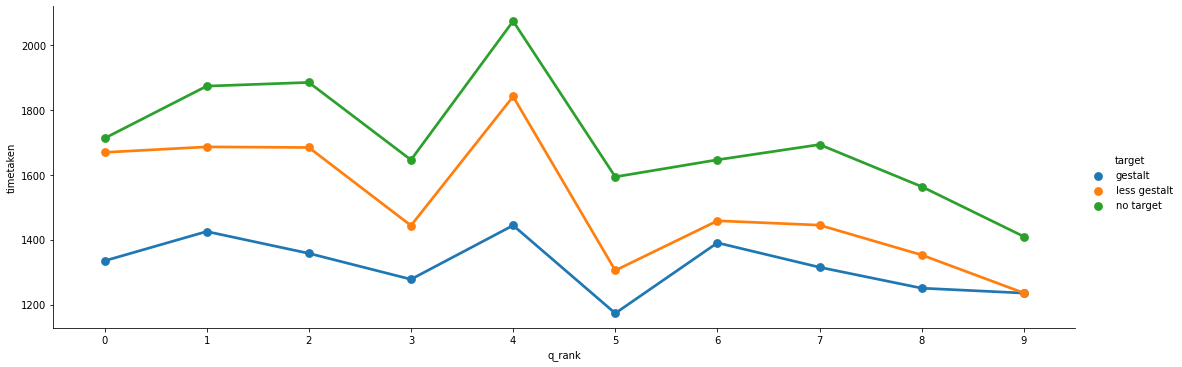

In [114]:
chart = plotMetricByBasemapq('euclidean_nearest_neighbor_mn','none')


<Figure size 1080x360 with 0 Axes>

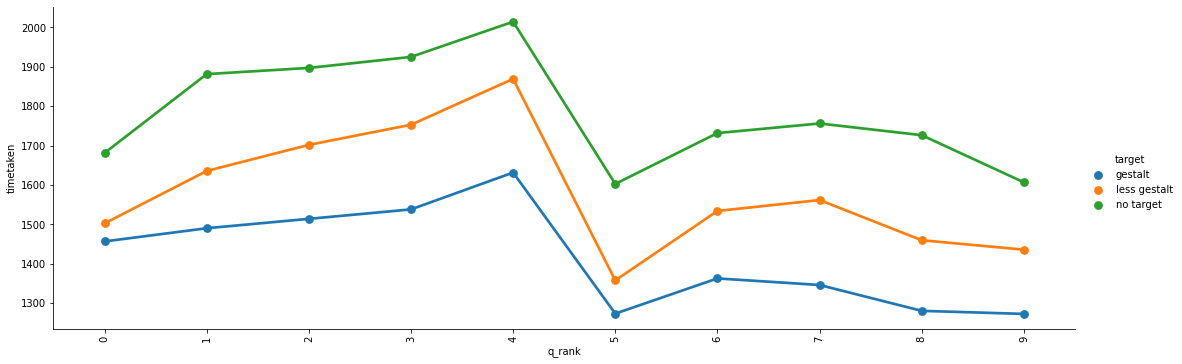

In [84]:
chart = plotMetricq('area_mn')

<Figure size 1080x360 with 0 Axes>

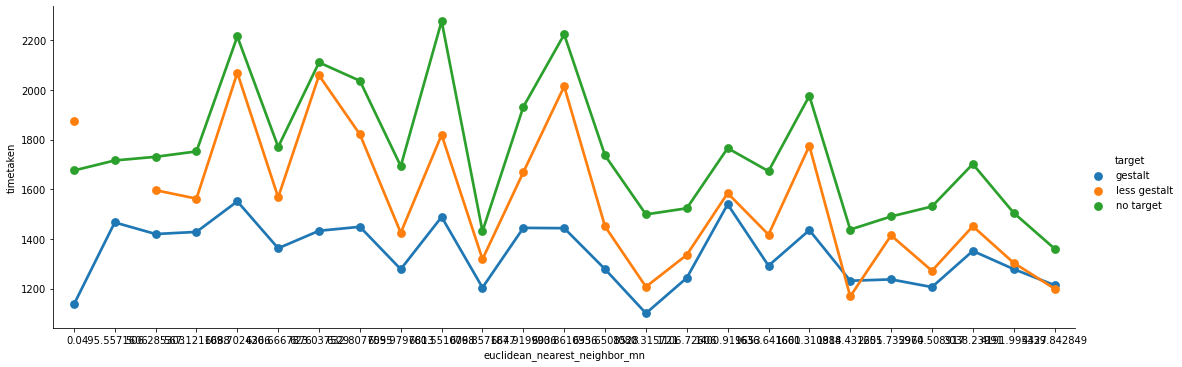

In [50]:
chart = plotMetricByBasemap('euclidean_nearest_neighbor_mn','none')

<Figure size 1080x360 with 0 Axes>

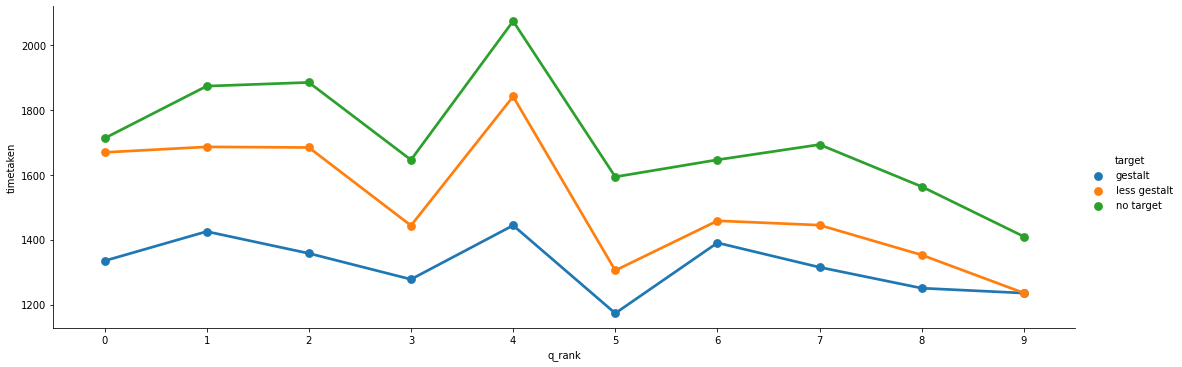

In [51]:
chart = plotMetricByBasemapq('euclidean_nearest_neighbor_mn','none')

<Figure size 1080x360 with 0 Axes>

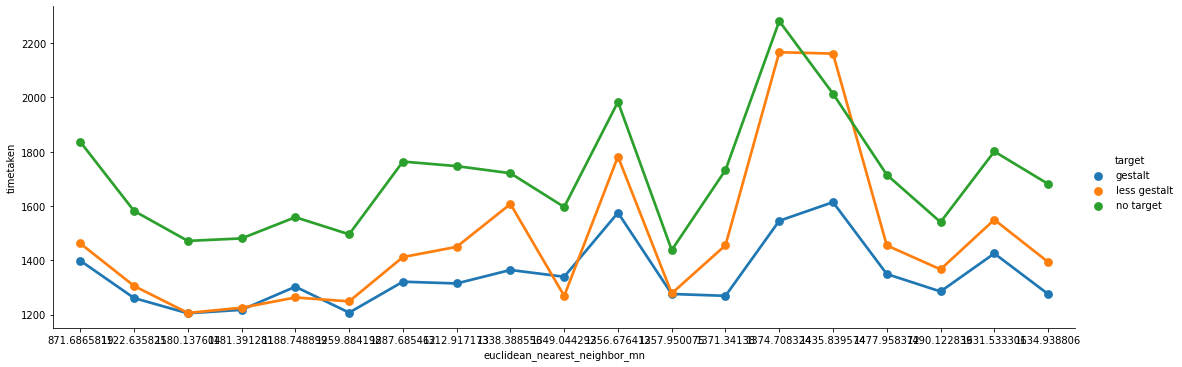

In [52]:
chart = plotMetricByBasemap('euclidean_nearest_neighbor_mn','dark')

<Figure size 1080x360 with 0 Axes>

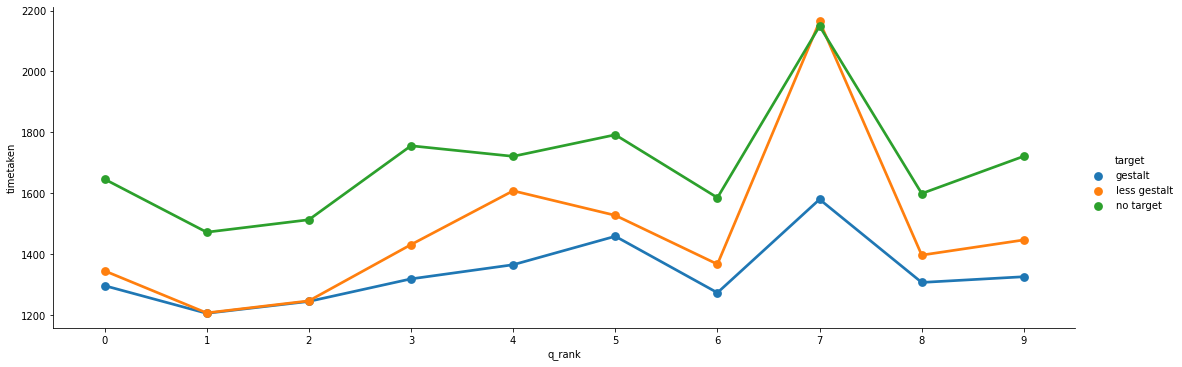

In [53]:
chart = plotMetricByBasemapq('euclidean_nearest_neighbor_mn','dark')

<Figure size 1080x360 with 0 Axes>

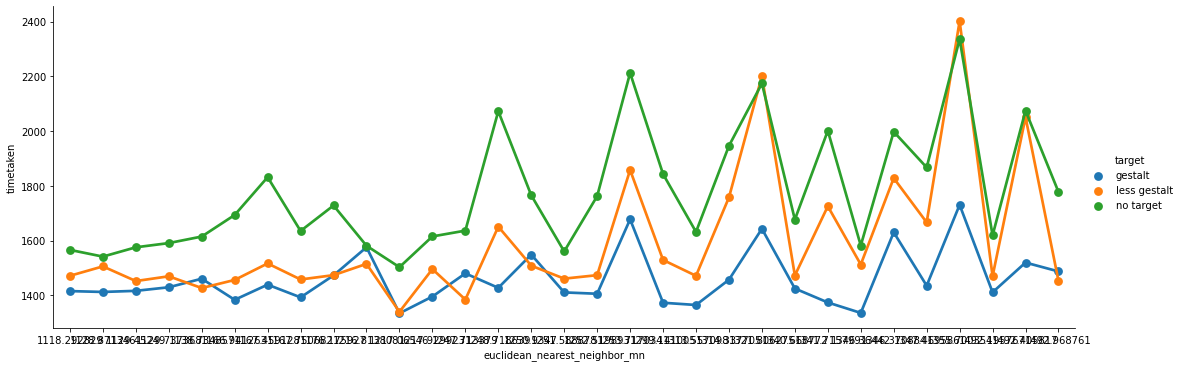

In [54]:
chart = plotMetricByBasemap('euclidean_nearest_neighbor_mn','imagery')

<Figure size 1080x360 with 0 Axes>

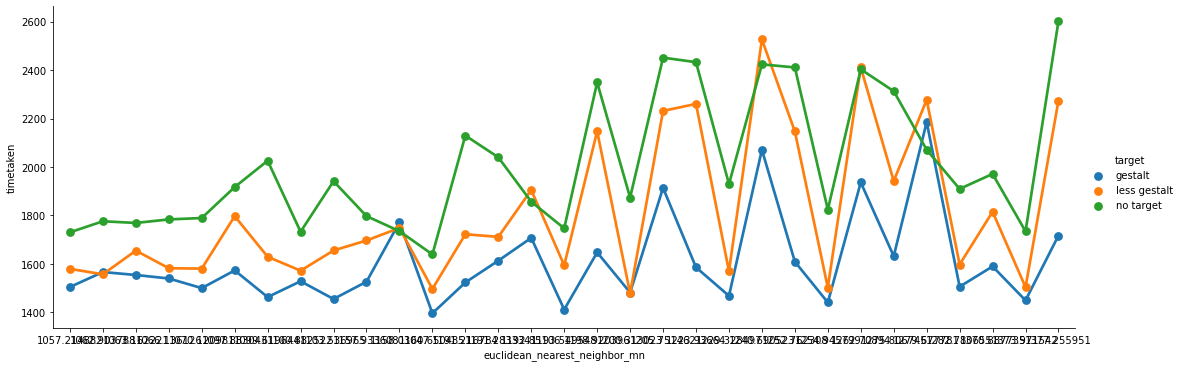

In [55]:
chart = plotMetricByBasemap('euclidean_nearest_neighbor_mn','streets')

<Figure size 1080x360 with 0 Axes>

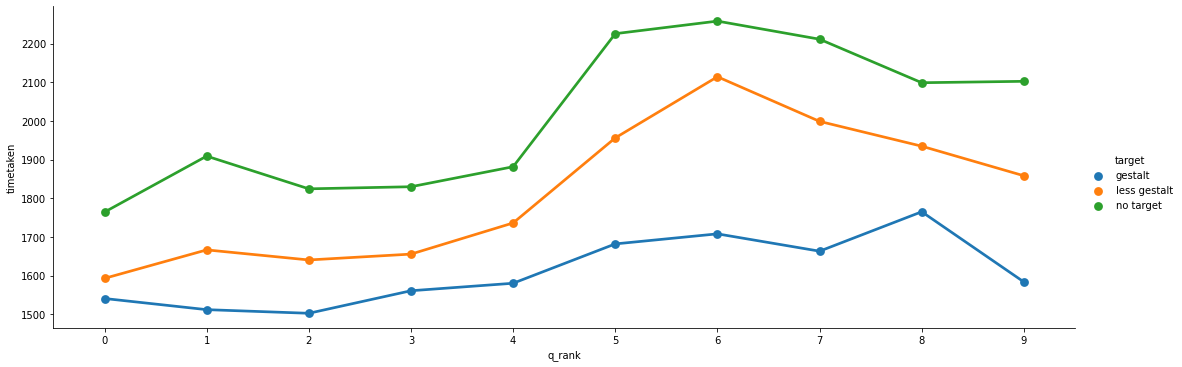

In [56]:
chart = plotMetricByBasemapq('euclidean_nearest_neighbor_mn','streets')

Text(0.5, 1.0, 'gs[-1, -2]')

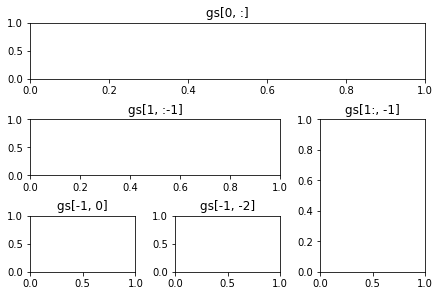

In [57]:
fig3 = plt.figure(constrained_layout=True)
gs = fig3.add_gridspec(3, 3)
f3_ax1 = fig3.add_subplot(gs[0, :])
f3_ax1.set_title('gs[0, :]')

f3_ax2 = fig3.add_subplot(gs[1, :-1])
f3_ax2.set_title('gs[1, :-1]')
f3_ax3 = fig3.add_subplot(gs[1:, -1])
f3_ax3.set_title('gs[1:, -1]')
f3_ax4 = fig3.add_subplot(gs[-1, 0])
f3_ax4.set_title('gs[-1, 0]')
f3_ax5 = fig3.add_subplot(gs[-1, -2])
f3_ax5.set_title('gs[-1, -2]')

<Figure size 1080x360 with 0 Axes>

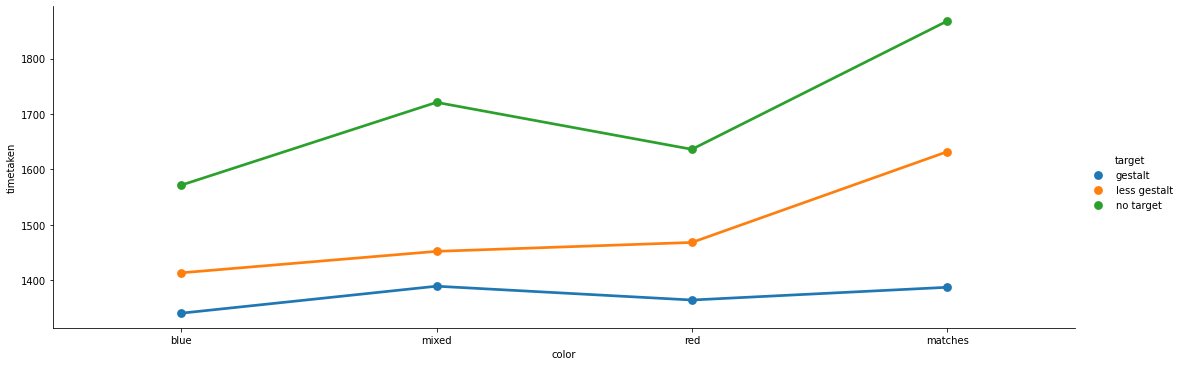

In [58]:
dflim = datadf.loc[datadf['distractor'] == 'random']

plt.figure(figsize=(15,5))
chart = sns.catplot(x="color", y="timetaken", hue="target",  data=dflim, kind="point",
                    hue_order=["gestalt","less gestalt","no target"],
                    order=["blue","mixed","red","matches"],
                    ci=None,height=5, aspect=3)
sns.reset_orig()

<Figure size 1080x360 with 0 Axes>

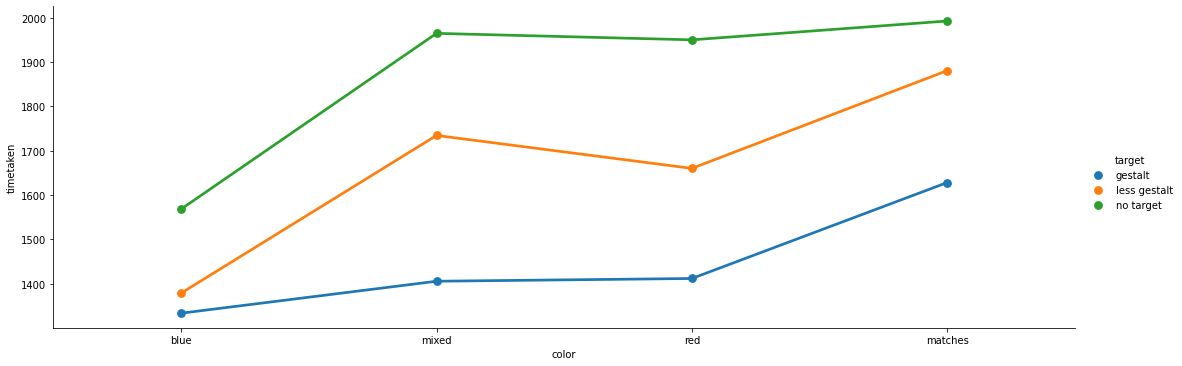

In [59]:
dflim = datadf.loc[datadf['distractor'] == 'clustered']

plt.figure(figsize=(15,5))
chart = sns.catplot(x="color", y="timetaken", hue="target",  data=dflim, kind="point",
                    hue_order=["gestalt","less gestalt","no target"],
                    order=["blue","mixed","red","matches"],
                    ci=None,height=5, aspect=3)
sns.reset_orig()

<Figure size 1080x360 with 0 Axes>

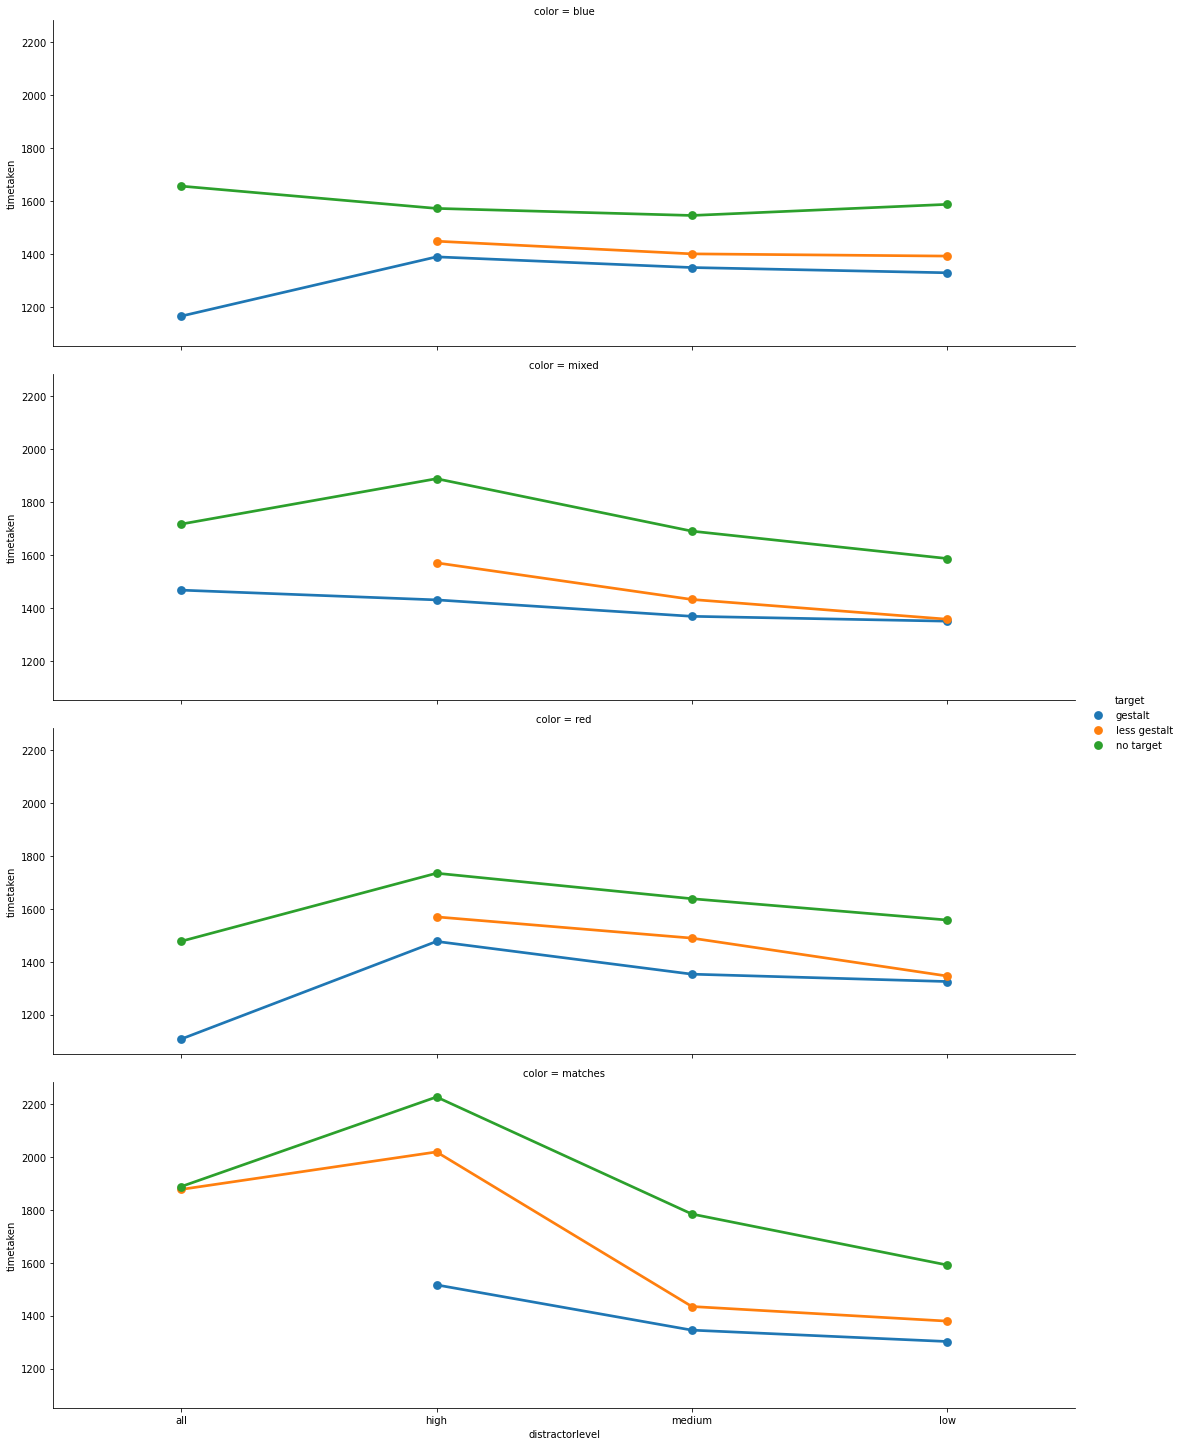

In [60]:
dflim = datadf.loc[datadf['distractor'] == 'random']

plt.figure(figsize=(15,5))
chart = sns.catplot(x="distractorlevel", y="timetaken", hue="target", row="color", data=dflim, kind="point",
                    hue_order=["gestalt","less gestalt","no target"],
                    row_order=["blue","mixed","red","matches"],
                    order=["all","high","medium","low"],
                    ci=None,height=5, aspect=3)
sns.reset_orig()



<Figure size 1080x360 with 0 Axes>

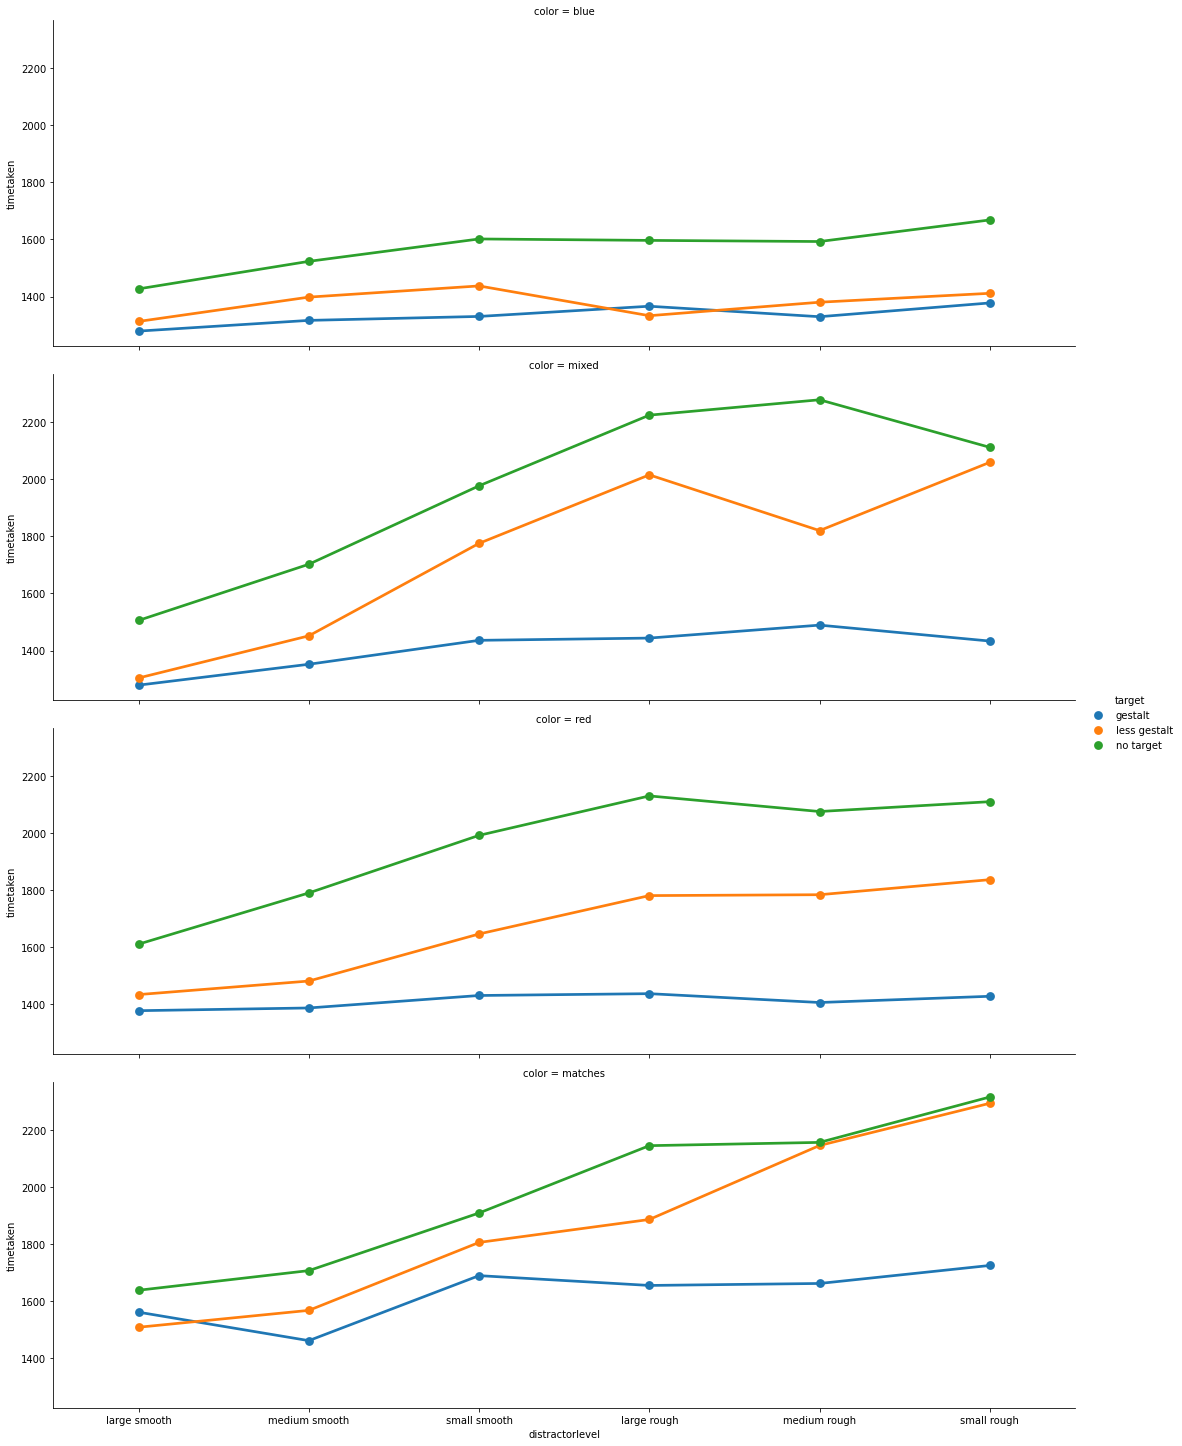

In [61]:
dflim = datadf.loc[datadf['distractor'] == 'clustered']

plt.figure(figsize=(15,5))
chart = sns.catplot(x="distractorlevel", y="timetaken", hue="target", row="color", data=dflim, kind="point",
                    hue_order=["gestalt","less gestalt","no target"],
                    row_order=["blue","mixed","red","matches"],
                    order=["large smooth","medium smooth","small smooth","large rough","medium rough","small rough"],
                    ci=None,height=5, aspect=3)
sns.reset_orig()



In [53]:
dflim = datadf.loc[datadf['distractor'] == 'random']
dflim = dflim.loc[dflim['distractorlevel'] == 'all']
dflim = dflim.loc[dflim['target'] == 'less gestalt']
dflim = dflim.loc[dflim['color'] == 'red']

print(dflim[['searchmapurl','color', 'timetaken']])

Empty DataFrame
Columns: [searchmapurl, color, timetaken]
Index: []


In [43]:
dflim = datadf.loc[datadf['distractor'] == 'random']
dflim = dflim.loc[dflim['distractorlevel'] == 'all']
dflim = dflim.loc[dflim['target'] == 'no target']
print(dflim[['searchmapurl','target', 'timetaken']])

                                             searchmapurl     target  \
80      target-none-distractor-random-all-distractor-c...  no target   
192     target-none-distractor-random-all-distractor-c...  no target   
197     target-none-distractor-random-all-distractor-c...  no target   
205     target-none-distractor-random-all-distractor-c...  no target   
575     target-none-distractor-random-all-distractor-c...  no target   
...                                                   ...        ...   
104503  target-none-distractor-random-all-distractor-c...  no target   
104891  target-none-distractor-random-all-distractor-c...  no target   
105063  target-none-distractor-random-all-distractor-c...  no target   
105098  target-none-distractor-random-all-distractor-c...  no target   
105137  target-none-distractor-random-all-distractor-c...  no target   

        timetaken  
80          842.0  
192        1036.0  
197        1056.0  
205        1006.0  
575        2262.0  
...           .